In [1]:
from netCDF4 import Dataset
from netCDF4 import MFDataset
import _pickle as pickle
#import matplotlib as mpl
#mpl.use('GTKCairo') # Qt5Agg, GTKAgg, GTK3Agg, GTKCairo
from matplotlib import pyplot
from matplotlib import contour
import numpy
import math
import pandas

In [2]:
ncfile = "C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_750steps/spifs/spifs_750_cabau.nc"
#ncfile = "/home/bramiozo/Dropbox/eScience/data_analysis/data/cabau_750steps/spifs/spifs_750_cabau.nc"
netcdf = Dataset(ncfile, "r") #, format="NETCDF4")

In [4]:
ncfile = "C:/Users\Bram van Es/Dropbox/eScience/data_analysis/data/cabau_fixed_forcings/spifs.nc"
#ncfile = "/home/bramiozo/Dropbox/eScience/data_analysis/data/cabau_fixed_forcings/spifs.nc"
netcdf_2 = Dataset(ncfile, "r") #, format="NETCDF4")

In [5]:
ds1 = netcdf[list(netcdf.groups.keys())[0]]

In [6]:
ds2 = netcdf_2[list(netcdf_2.groups.keys())[0]]

In [7]:
time_series = ds2['time'][:]/3600/24
Time_series = netcdf_2['Time'][:]/3600/24

In [8]:
height_series = netcdf_2['zf'][:]
Height_series = ds2['Zf']


In [9]:
meas_heights = [100, 200, 300, 1000, 2000, 3000, 4000]
ref_heights = [numpy.argmin(numpy.abs(h-height_series)) for h in meas_heights]
Ref_heights = [numpy.argmin(numpy.abs(h-Height_series[1])) for h in meas_heights]

In [10]:
height_series[ref_heights]
Height_series[1][Ref_heights]

array([  109.08261108,   226.06544495,   300.48046875,  1048.12792969,
        2102.51318359,  2931.38378906,  3906.61499023], dtype=float32)

In [11]:
meas_times = numpy.linspace(0, 7, num=15) # in half days 
ref_times = [numpy.argmin(numpy.abs(t - Time_series)) for t in meas_times] 

In [39]:
ref_times

[0, 47, 95, 143, 191, 239, 287, 335, 383, 431, 479, 527, 575, 623, 661]

In [12]:
E = len(Height_series[1])-1
B = numpy.argmin(numpy.abs(numpy.max(height_series)-Height_series[1]))
numSteps = E - B +1
oifs_range = list(numpy.linspace(E, B, numSteps).astype("int"))

In [13]:
diff_heights = numpy.diff(numpy.hstack((0, height_series)))
diff_Heights = []
for i in range(0, len(Time_series)):
    diff_Heights.append(-numpy.diff(numpy.hstack((Height_series[i], 0))))


In [14]:

def n_plots(ax, Xaxis, Ydata,xlab, ylab, labels):
    for i in range(0, len(Xaxis)):
        ax.plot(Xaxis[i], Ydata[i], label = labels[i])
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    lgd = ax.legend(loc=0, bbox_to_anchor=(1.2, 1), prop={'size': 14})
    return ax, lgd
    
    

def two_y_scales(ax1, xaxis1, xaxis2, data1, data2, c1, c2, ylab1, ylab2, xlab, labels):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    x-axis1 : array-like
        x-axis values for data set 1 
    
    x-axis2 : array-like
        x-axis values for data set 2

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    plt1, = ax1.plot(xaxis1, data1, '-+', color=c1, label = labels[0], )
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab1)
    plt2, =  ax2.plot(xaxis2, data2, '-+', color=c2, label = labels[1])
    ax2.set_ylabel(ylab2)
    
    lns = [plt1, plt2]
    labs = [l.get_label() for l in lns]
    ax1.grid('on')
    lgd = ax1.legend(lns, labs, bbox_to_anchor=(1.2, 1), prop={'size': 13})
    return ax1, ax2, lgd

def two_x_scales(ax1, xaxis1, xaxis2, data1, data2, c1, c2, xlab1, xlab2, ylab, labels):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    x-axis1 : array-like
        x-axis values for data set 1 
    
    x-axis2 : array-like
        x-axis values for data set 2

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twiny()

    plt1, = ax1.plot(xaxis1, data1, '-+', color=c1, label = labels[0], )
    ax1.set_ylabel(ylab)
    ax1.set_xlabel(xlab1)
    plt2, = ax2.plot(xaxis2, data2, '-+', color=c2, label = labels[1])
    ax2.set_xlabel(xlab2)
    
    lns = [plt1, plt2]
    labs = [l.get_label() for l in lns]
    ax1.grid('on')
    lgd = ax1.legend(lns, labs, bbox_to_anchor=(1.2, 1), prop={'size': 13})
    
    return ax1, ax2, lgd

# Domain-wise averages

In [15]:
profile_agg_OIFS = ['U', 'V', 'THL', 'f_SH', 'f_U', 'f_V', 'QT', 'QL', 'f_T', 'f_A', 'A',
                                'Pf', 'Ph', 'QI', 'Tv', 'T', 'Zf', 'Zh', 'SH']
profile_agg_DALES = ['u', 'v', 'thl', 't_', 't', 'qt', 'ql', 'f_thl', 
                                'f_qt', 'f_u', 'f_v', 'presf']
xy_DALES = ['lwp', 'rwp', 'twp']


In [16]:
## plot tuples
profile_comparison = [('u', 'U'), ('v','V'), ('thl', 'THL'), ('qt','QT'), ('ql','QL'), 
                     ('t','T'), ('f_u', 'f_U'), ('f_v', 'f_V'), ('presf','Pf'), 
                      ('lwp','LWP'), ('twp', 'TWP')]

profile_comparison_DALES_mono = [('t', 't_')]
profile_comparison_DALES_dual = [('f_thl', 'thl'), ('f_qt', 'qt'), ('qt', 'thl')] # two vertical axes
profile_comparison_OIFS_mono  = [('Pf', 'Ph')]
profile_comparison_OIFS_dual  = [('f_A', 'A'), ('QT', 'THL')] # two vertical axes

profile_height_DALES = [('t', 'qt'), ('qt', 'thl'), ('f_thl', 'f_qt'), ('ql', 'qt')] # 
profile_height_OIFS = [('T', 'QT'), ('QT', 'THL'), ('QL', 'QT'), ('f_SH', 'SH'), ('A', 'SH')] #

profile_height_comparison = [('t', 'T'), ('qt', 'QT'), ('ql', 'QL')]
profile_height_comparison_water = [('lwp', 'LWP'), ('twp', 'TWP')]

In [17]:
fig_size = (15, 10)

In [18]:
agg_time_series = {}
for varname in profile_agg_DALES:
    total_dales = []
    for i in range(1, len(Time_series)):
        total_dales.append({'timestep': i, 'total':sum(ds2[varname][i][:])/len(ds2[varname][i][:])})
    agg_time_series[varname]= {'ts': pandas.DataFrame(data=total_dales)}


In [19]:
for varname in profile_agg_OIFS:
    total_OIFS = []
    for i in range(1, len(Time_series)):
        total_OIFS.append({'timestep': i, 'total':sum(ds2[varname][i][oifs_range])/len(oifs_range)})
    agg_time_series[varname]= {'ts': pandas.DataFrame(data=total_OIFS)}

## LWP 

In [20]:
total_lw_2 = []
total_LW_2 = []
profile_lw = {}
profile_LW = {}
R = 8.3144621
for i in range(1, len(Time_series)):
    total_lw_2.append({'timestep': i, 'total':sum(netcdf_2['38062/ql'][i, :]*(netcdf_2['38062/presf'][i, :]/netcdf_2['38062/t_'][i][:]/R)*diff_heights[:])});
    
agg_time_series['lwp'] = {'ts': pandas.DataFrame(data=total_lw_2)}

for i in range(1, len(Time_series)):
    total_LW_2.append({'timestep': i, 'total':sum(netcdf_2['38062/QL'][i, oifs_range]*(netcdf_2['38062/Pf'][i, oifs_range]/netcdf_2['38062/T'][i][oifs_range]/R)*diff_Heights[i][oifs_range])});
agg_time_series['LWP']  =  {'ts': pandas.DataFrame(data=total_LW_2)}


c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\ma\core.py:1046: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [21]:
lwp_profiles = ds2['ql'][:, :]*(ds2['presf'][:, :]/ds2['t_'][:][:]/R)*diff_heights[:]
twp_profiles = ds2['qt'][:, :]*(ds2['presf'][:, :]/ds2['t_'][:][:]/R)*diff_heights[:]

c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\ma\core.py:1046: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [22]:
LWP_profiles = ds2['QL'][:, :]*(ds2['Pf'][:, :]/ds2['T'][:][:]/R)*diff_Heights[:][:]
TWP_profiles = ds2['QL'][:, :]*(ds2['Pf'][:, :]/ds2['T'][:][:]/R)*diff_Heights[:][:]

c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\ma\core.py:1046: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


## TWP 

In [23]:
total_tw_2 = []
total_TW_2 = []
R = 8.3144621
for i in range(1, len(Time_series)):
    total_tw_2.append({'timestep': i, 'total':sum(netcdf_2['38062/qt'][i][:]*(netcdf_2['38062/presf'][i][:]/netcdf_2['38062/t_'][i][:]/R)*diff_heights[:])});
agg_time_series['twp'] = {'ts': pandas.DataFrame(data=total_tw_2)}

for i in range(1, len(Time_series)):
    total_TW_2.append({'timestep': i, 'total':sum(netcdf_2['38062/QT'][i][oifs_range]*(netcdf_2['38062/Pf'][i][oifs_range]/netcdf_2['38062/T'][i][oifs_range]/R)*diff_Heights[i][oifs_range])});
agg_time_series['TWP'] = {'ts': pandas.DataFrame(data=total_TW_2)}


c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\ma\core.py:1046: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [24]:
try:
    total_num_xy_cell = numpy.shape(ds2['lwp'][1,:,:])[0]**2
    total_lw = []
    for i in range(1, len(time_series)):
        total_lw.append({'time':i, 'lw':sum(sum(ds2['lwp'][i,:,:]))/total_num_xy_cell})
    total_lw_df =pandas.DataFrame(data=total_lw)
    total_rw = []
    for i in range(1, len(time_series)):
        total_rw.append({'time':i, 'rw':sum(sum(ds2['rwp'][i,:,:]))/total_num_xy_cell})
    total_rw_df =pandas.DataFrame(data=total_rw)
    total_tw = []
    for i in range(1, len(time_series)):
        total_tw.append({'time':i, 'tw':sum(sum(ds2['twp'][i,:,:]))/total_num_xy_cell})
    total_tw_df =pandas.DataFrame(data=total_tw)
except IndexError as e:
    print('index error')

index error


# Plots
## time evolution of aggregate profile values

c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\core\numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


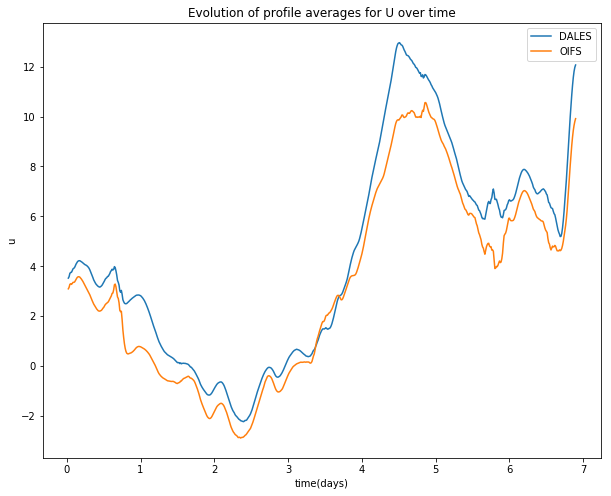

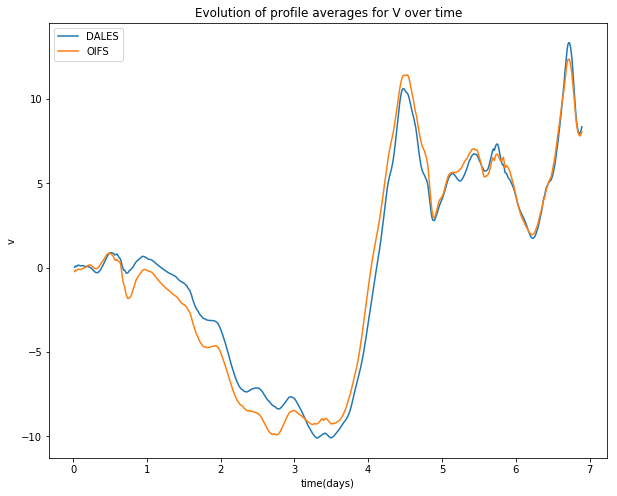

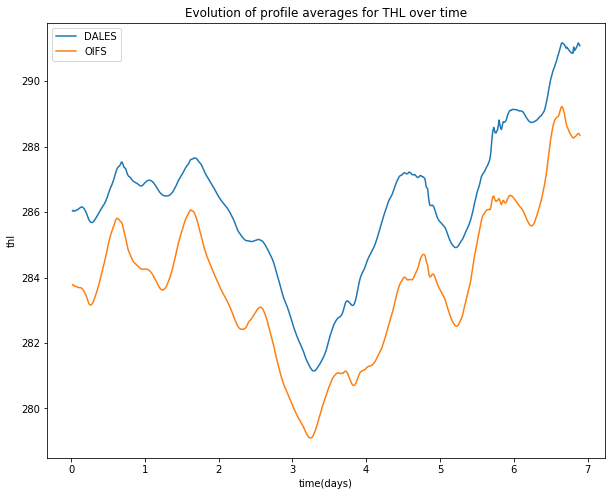

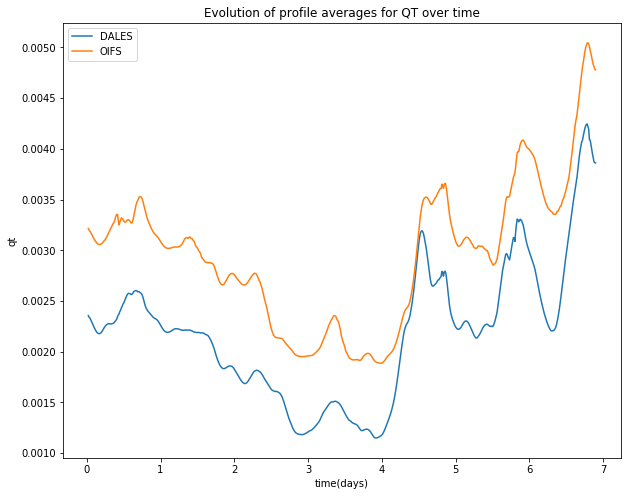

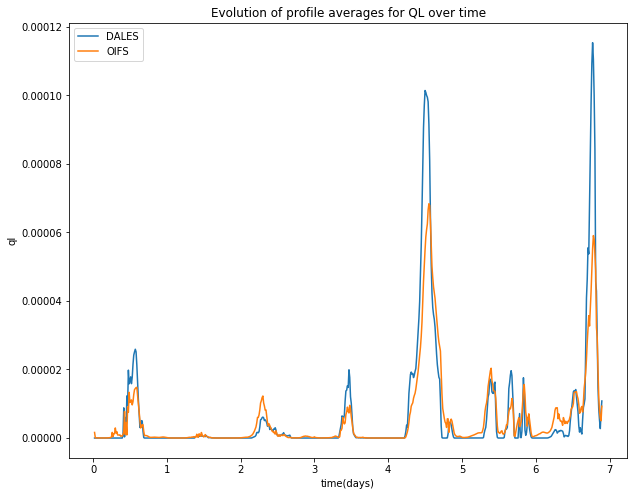

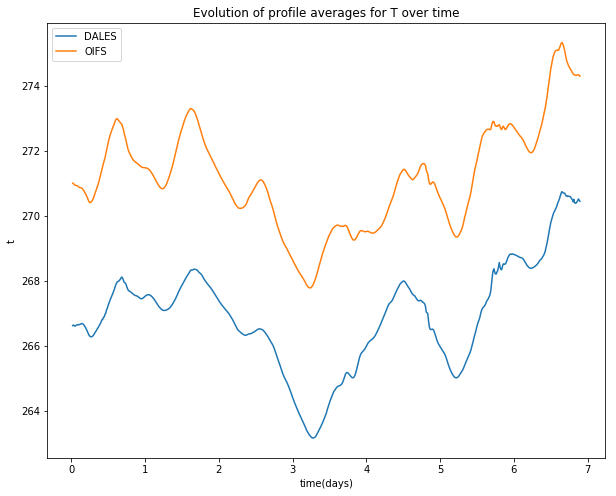

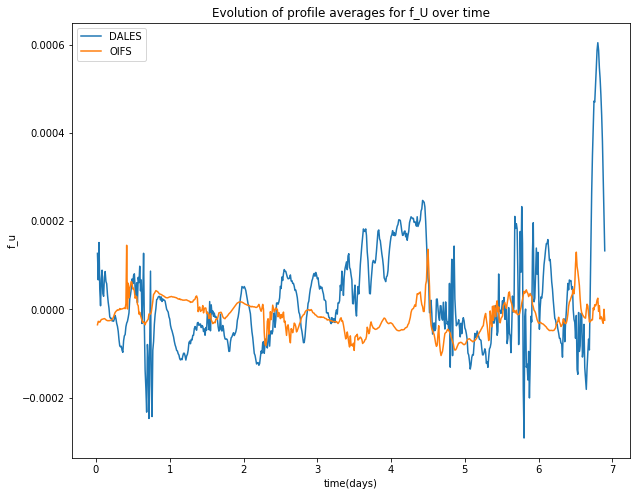

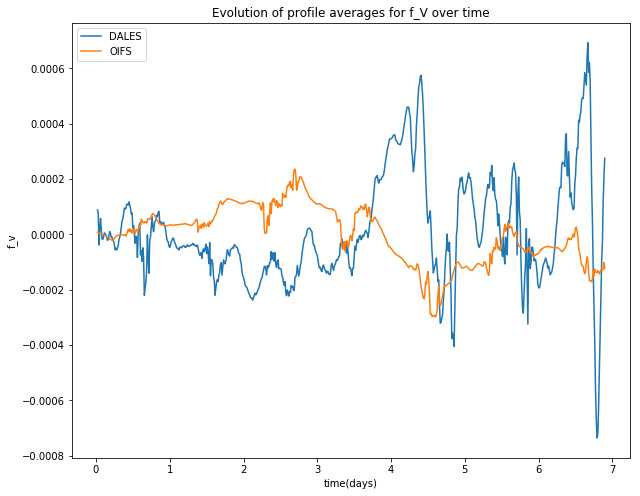

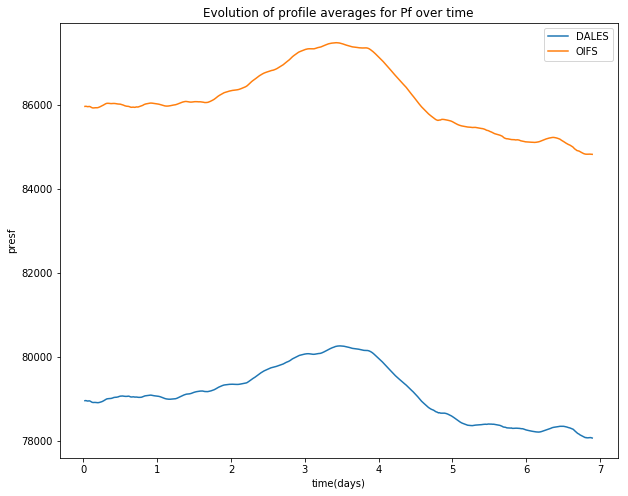

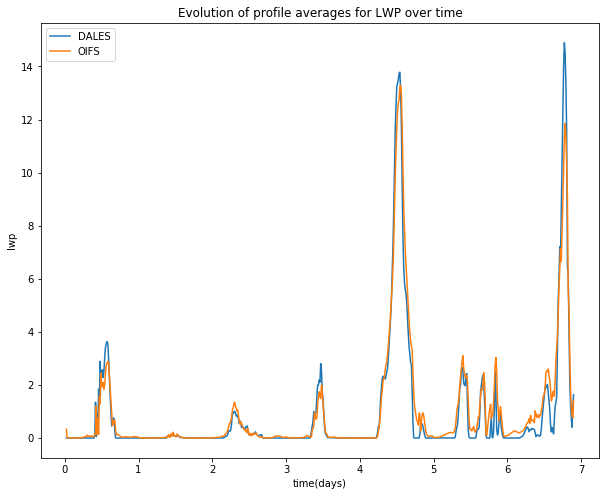

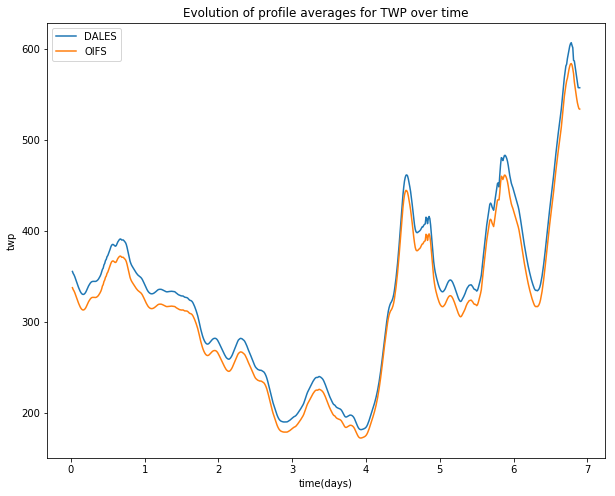

In [235]:
fig_size = (10, 8)
dpi_ = 300
for plot_tuple in profile_comparison:
    figure = pyplot.figure(figsize=fig_size)
    pyplot.plot(Time_series[1:], agg_time_series[plot_tuple[0]]['ts']['total'], label = 'DALES')
    pyplot.plot(Time_series[1:], agg_time_series[plot_tuple[1]]['ts']['total'], label = 'OIFS')
    pyplot.xlabel("time(days)")
    pyplot.ylabel(plot_tuple[0])
    pyplot.title('Evolution of profile averages for {} over time'.format(plot_tuple[1]))
    pyplot.legend()
    pyplot.savefig("output/DALES_OIFS_{}_total_timeseries.png".format(plot_tuple[1]), dpi = dpi_ )
    pyplot.show()
    pyplot.close()
    

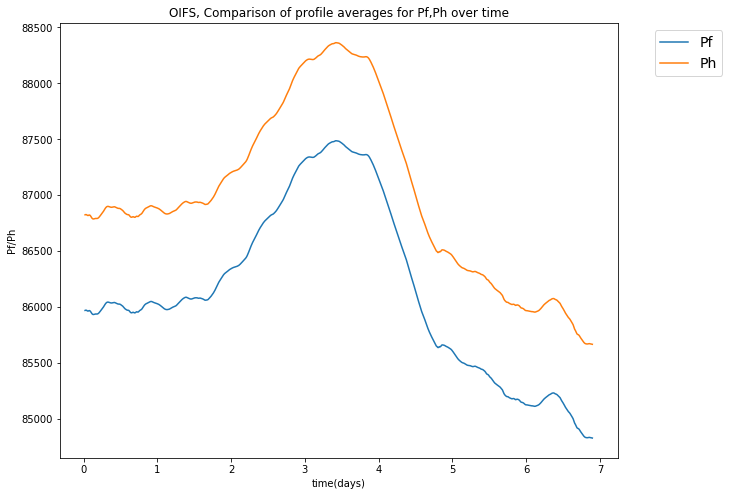

In [21]:
# OIFS mono plots
fig_size = (10, 8)
dpi_ = 300

for plot_tuple in profile_comparison_OIFS_mono:
    fig, ax = pyplot.subplots(figsize=fig_size)
    Xdata = []
    Ydata = []
    labels = []
    for var in plot_tuple:
        Xdata.append(Time_series[1:])
        Ydata.append(agg_time_series[var]['ts']['total'])
        labels.append(var)
    
    ax1, lgd = n_plots(ax, Xdata, Ydata, "time(days)", "/".join(labels), labels)
    pyplot.title('OIFS, Comparison of profile averages for {} over time'.format(",".join(labels)))
    pyplot.savefig("output/OIFS_{}_total_timeseries.png".format(plot_tuple[1]), 
                   dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')o
    pyplot.show()
    pyplot.close()
    

c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\core\numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


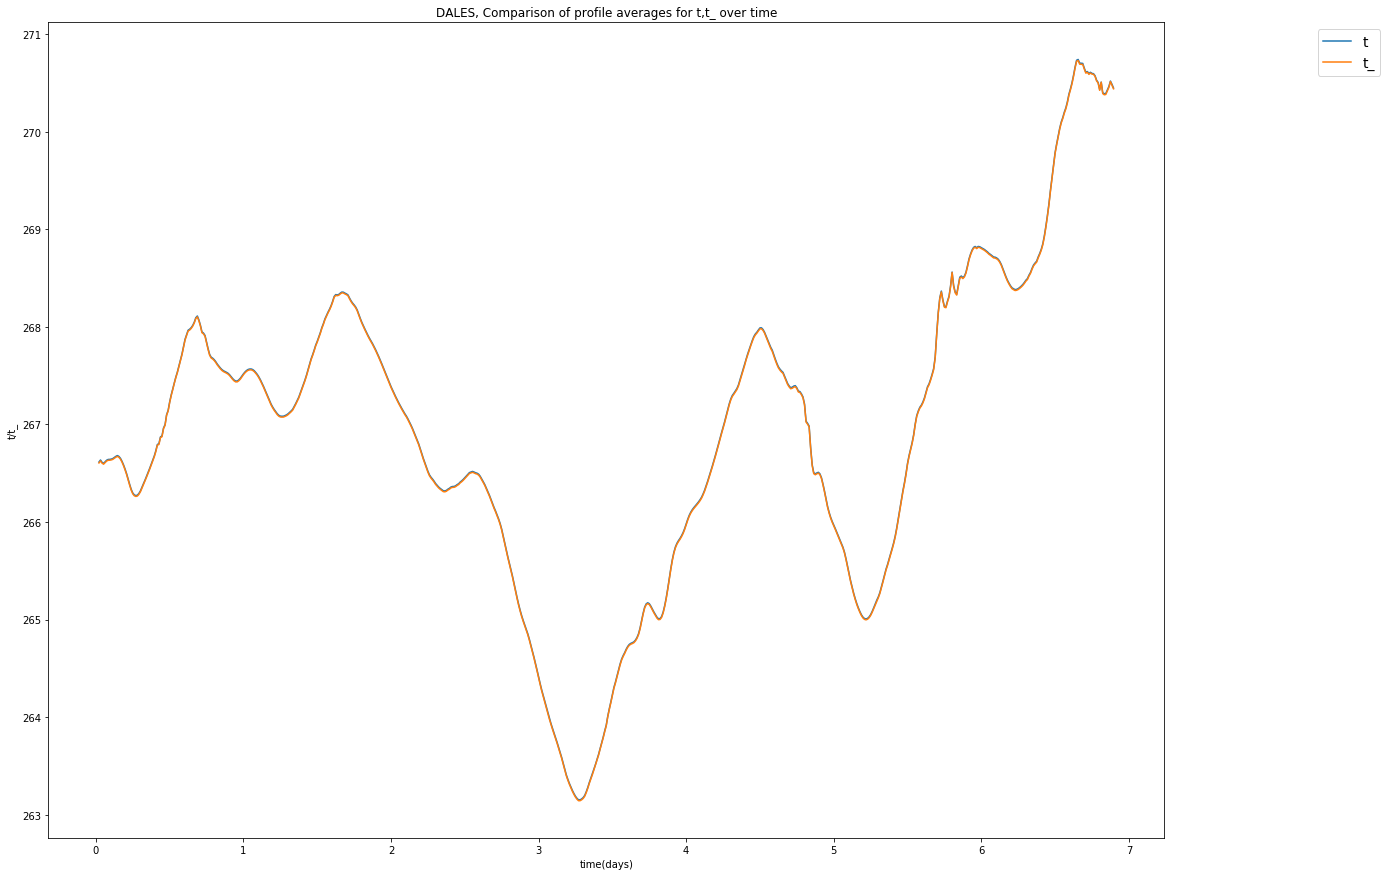

In [29]:
# DALES mono plots
fig_size = (20, 15)
dpi_ = 300

for plot_tuple in profile_comparison_DALES_mono:
    fig, ax = pyplot.subplots(figsize=fig_size)
    Xdata = []
    Ydata = []
    labels = []
    for var in plot_tuple:
        Xdata.append(Time_series[1:])
        Ydata.append(agg_time_series[var]['ts']['total'])
        labels.append(var)
    
    ax1, lgd = n_plots(ax, Xdata, Ydata, "time(days)", "/".join(labels), labels)
    pyplot.title('DALES, Comparison of profile averages for {} over time'.format(",".join(labels)))
    pyplot.savefig("output/DALES_{}_total_timeseries.png".format(plot_tuple[1]), 
                   dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')
    pyplot.show()
    pyplot.close()
    

c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\core\numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


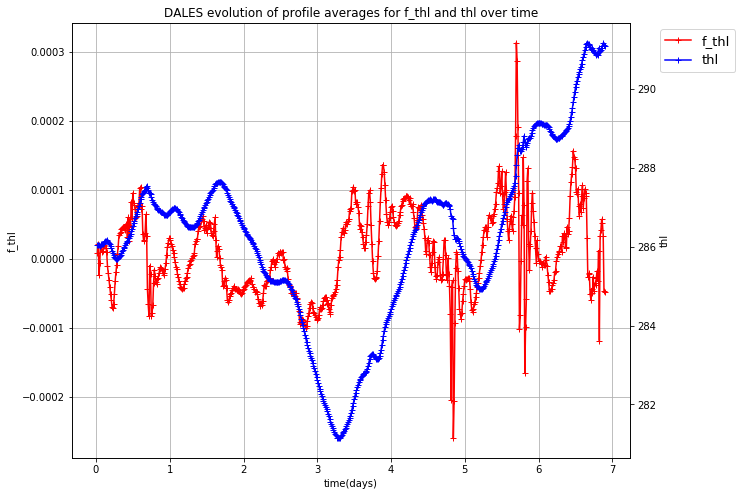

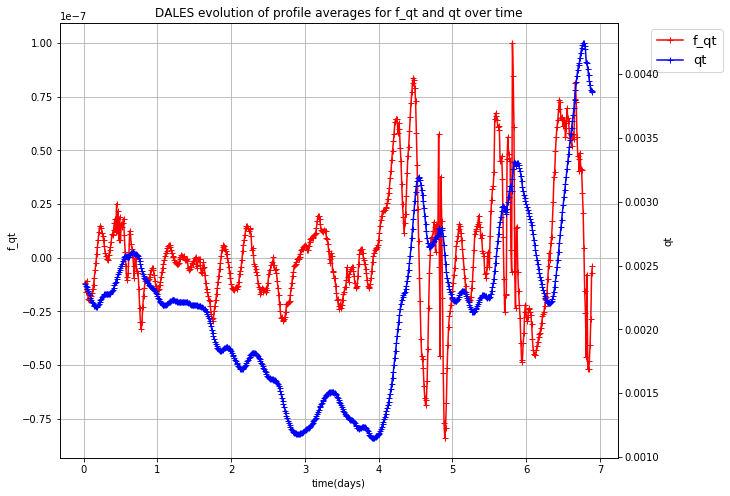

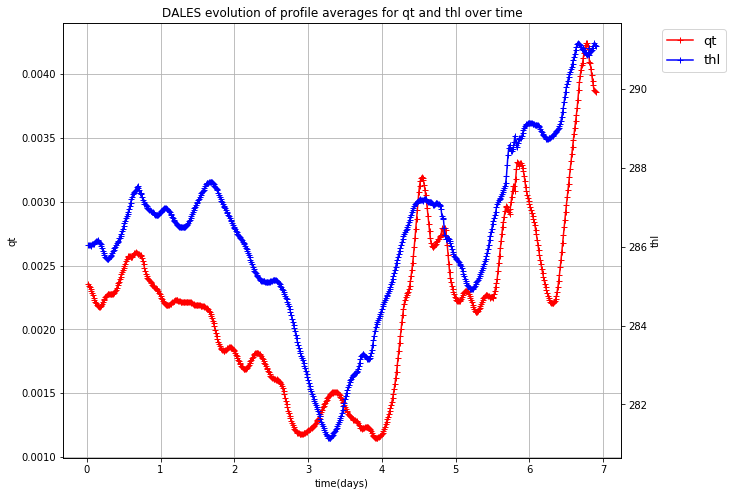

In [271]:
# DALES dual plots
fig_size = (10, 8)
dpi_ = 300
for plot_tuple in profile_comparison_DALES_dual:
    fig, ax = pyplot.subplots(figsize=fig_size)
    ax1, ax2, lgd = two_y_scales(ax, Time_series[1:], Time_series[1:], 
                            agg_time_series[plot_tuple[0]]['ts']['total'],
                            agg_time_series[plot_tuple[1]]['ts']['total'], 
                              'r', 'b', plot_tuple[0], plot_tuple[1], 
                            'time(days)', labels=[plot_tuple[0], plot_tuple[1]])
    pyplot.title('DALES evolution of profile averages for {} and {} over time'.format(plot_tuple[0], plot_tuple[1]))
    pyplot.savefig("output/DALES_dual_{}-{}_total_timeseries.png".format(plot_tuple[0], plot_tuple[1]), 
                   dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')
    pyplot.show()
    pyplot.close()
    


c:\users\bramva~1\envs\worken~1\lib\site-packages\numpy\core\numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


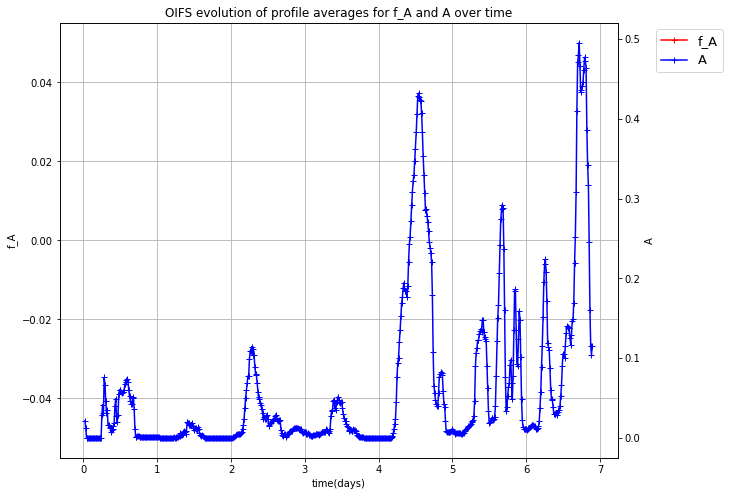

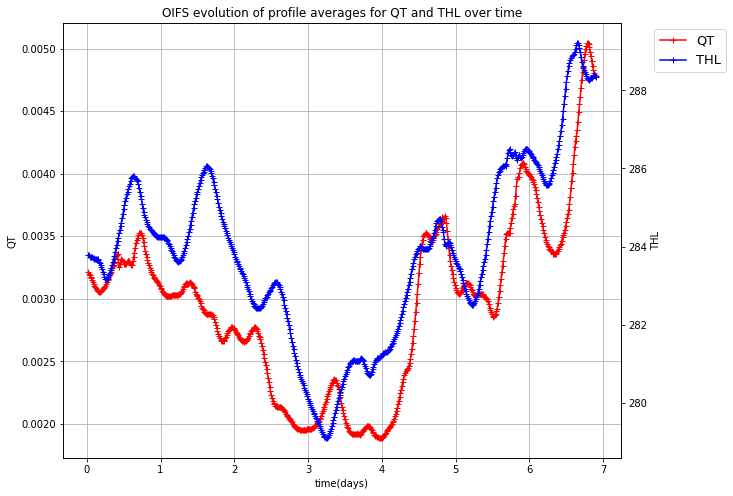

In [56]:
# OIFS dual plots
fig_size = (10, 8)
dpi_ = 300
for plot_tuple in profile_comparison_OIFS_dual:
    fig, ax = pyplot.subplots(figsize=fig_size)
    ax1, ax2, lgd = two_y_scales(ax, Time_series[1:], Time_series[1:], 
                            agg_time_series[plot_tuple[0]]['ts']['total'],
                            agg_time_series[plot_tuple[1]]['ts']['total'], 
                              'r', 'b', plot_tuple[0], plot_tuple[1], 
                            'time(days)', labels=[plot_tuple[0], plot_tuple[1]])
    pyplot.title('OIFS evolution of profile averages for {} and {} over time'.format(plot_tuple[0], plot_tuple[1]))
    pyplot.savefig("output/OIFS_dual_{}_total_timeseries.png".format(plot_tuple[1]), 
                   dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')
    pyplot.show()
    pyplot.close()

## time evolution of profile values at specific heights, two y-axes for different units

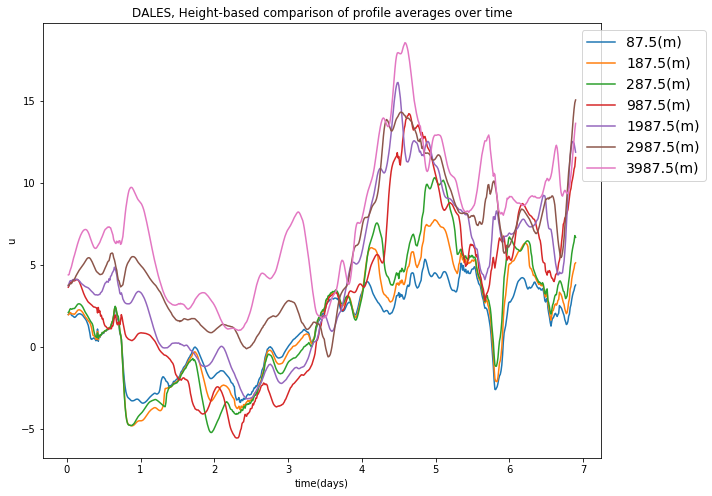

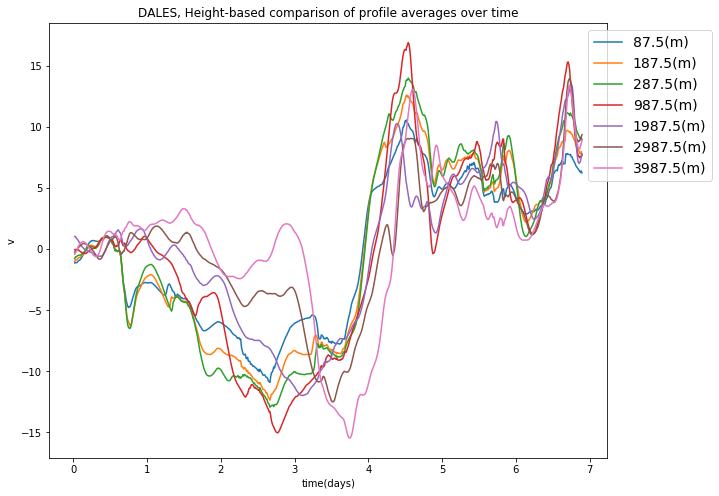

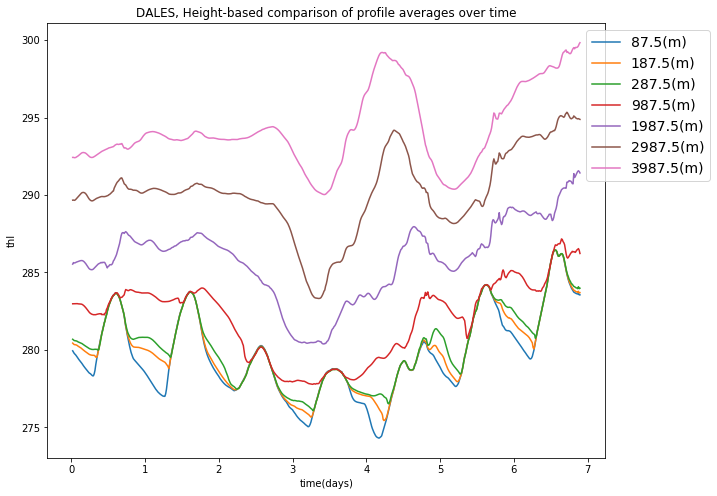

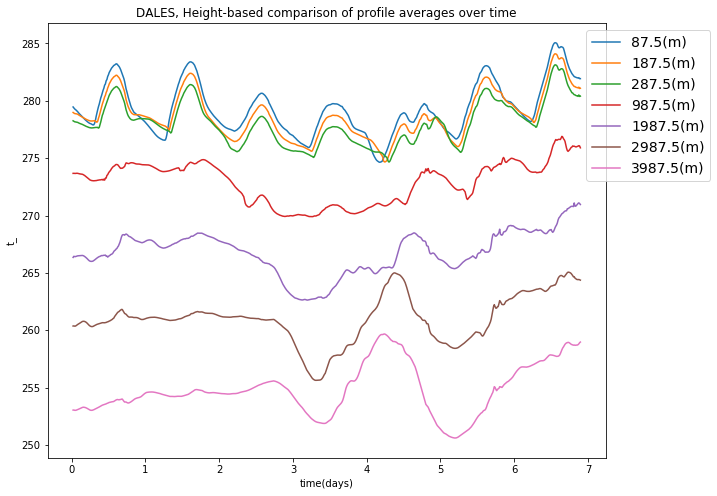

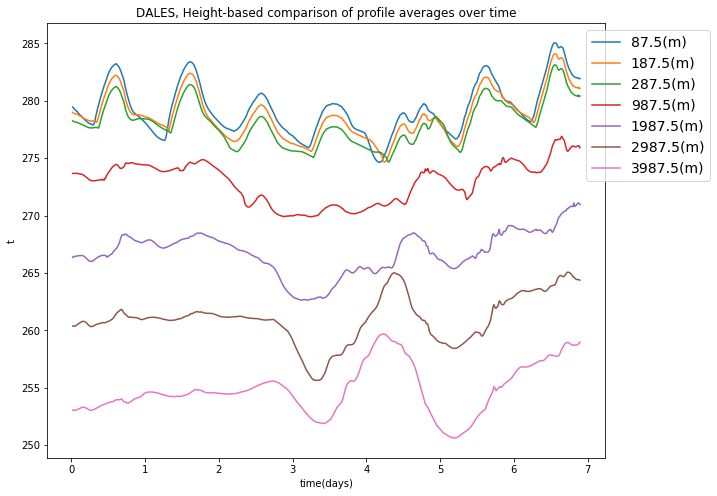

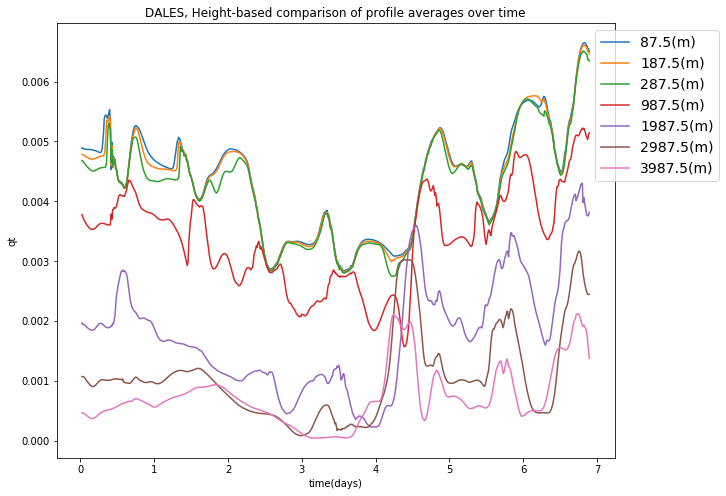

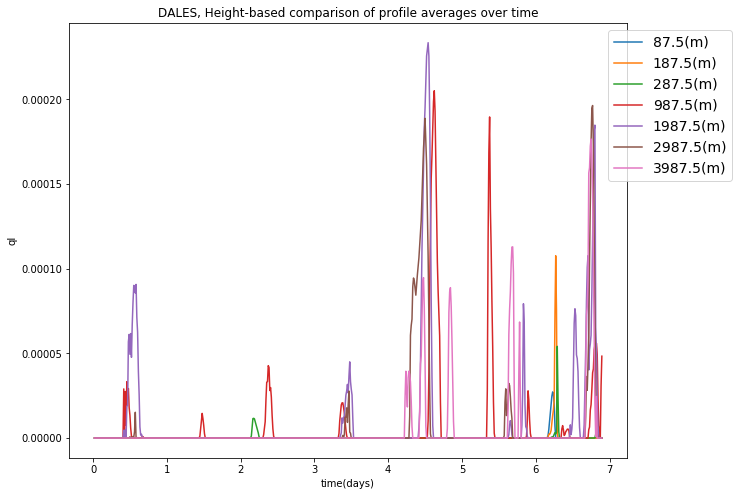

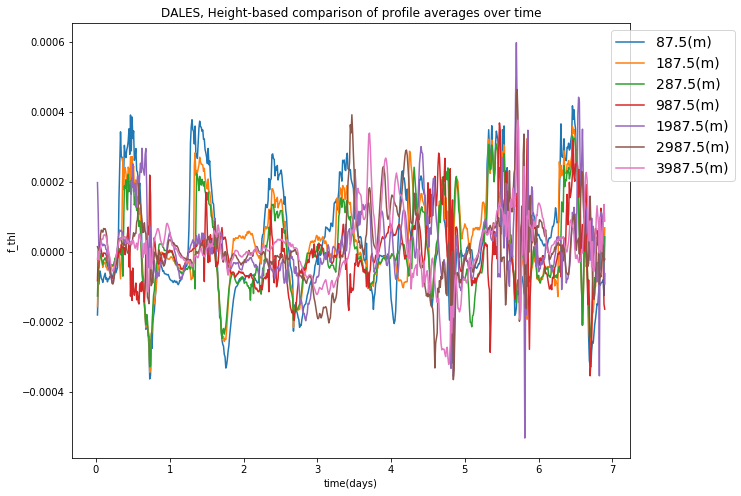

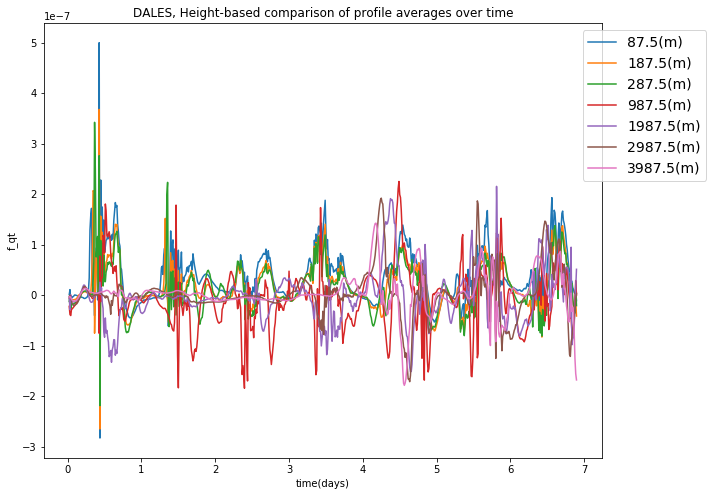

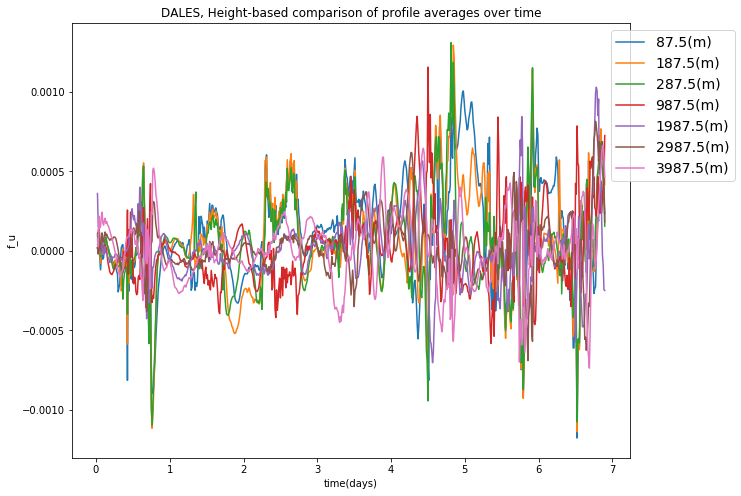

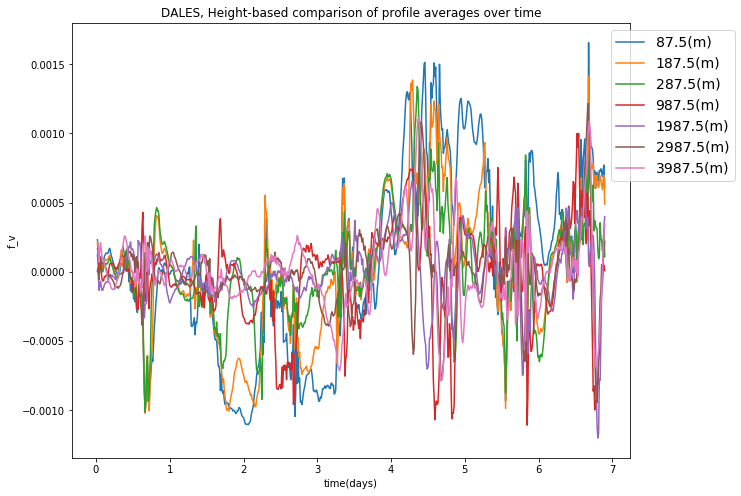

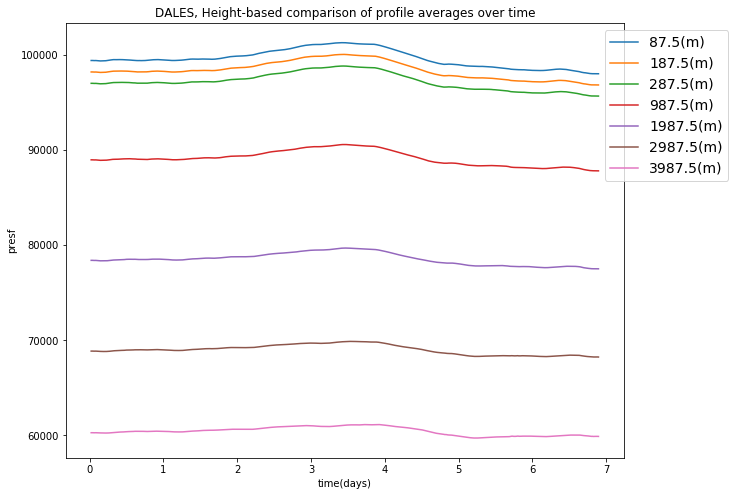

In [43]:
# DALES 
fig_size = (10, 8)
dpi_ = 300

for var in profile_agg_DALES:
    fig, ax = pyplot.subplots(figsize=fig_size)
    Xdata = []
    Ydata = []
    labels = []
    for k in ref_heights:
        Xdata.append(Time_series[1:-1])
        Ydata.append(ds2[var][1:-1,k])
        labels.append(str(height_series[k])+"(m)")
    
    ax1, lgd = n_plots(ax, Xdata, Ydata, "time(days)", var, labels)
    pyplot.title('DALES, Height-based comparison of profile averages over time')
    pyplot.savefig("output/DALES_{}_levels_timeseries.png".format(var), 
                   dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')
    pyplot.show()
    pyplot.close()

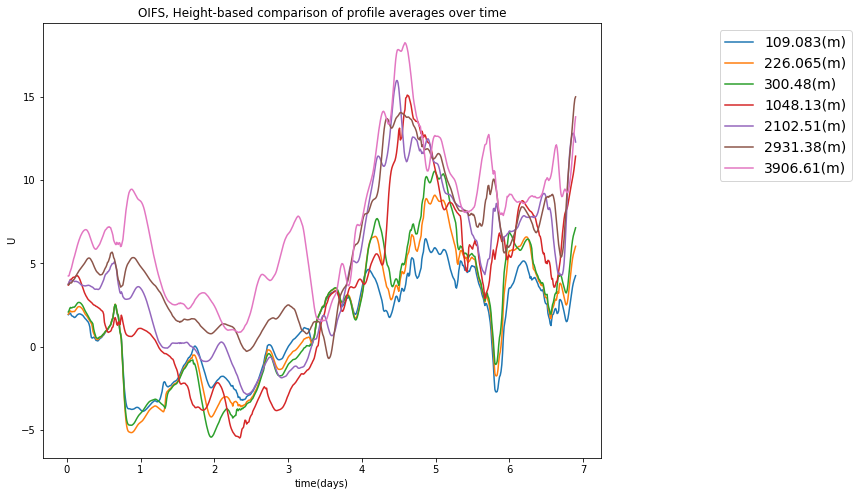

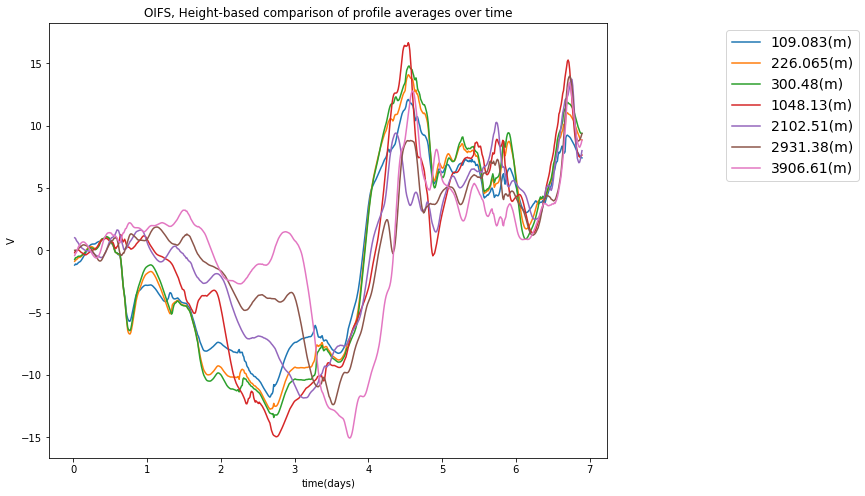

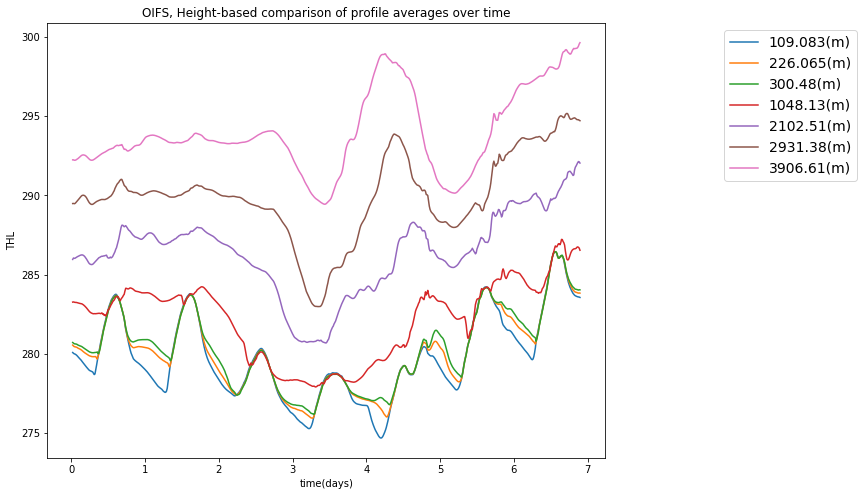

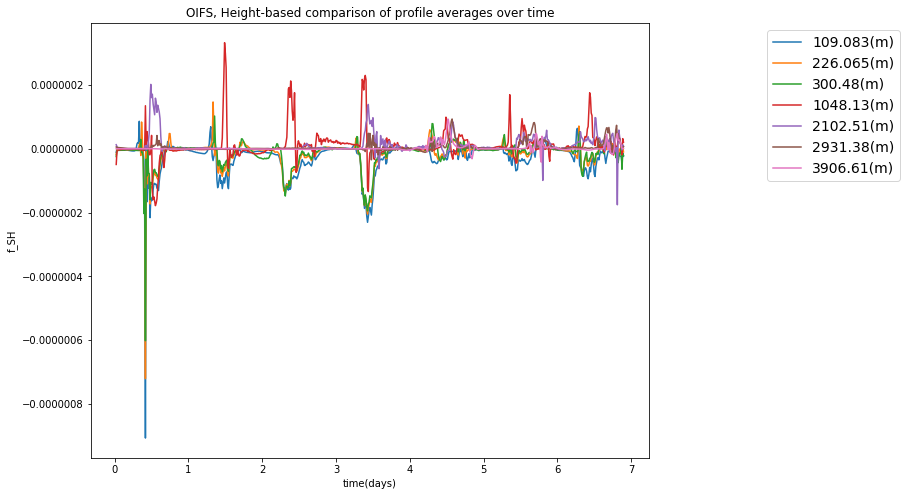

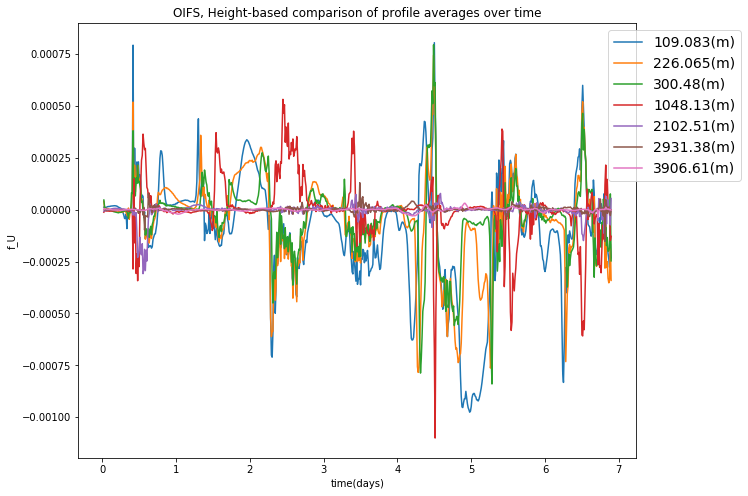

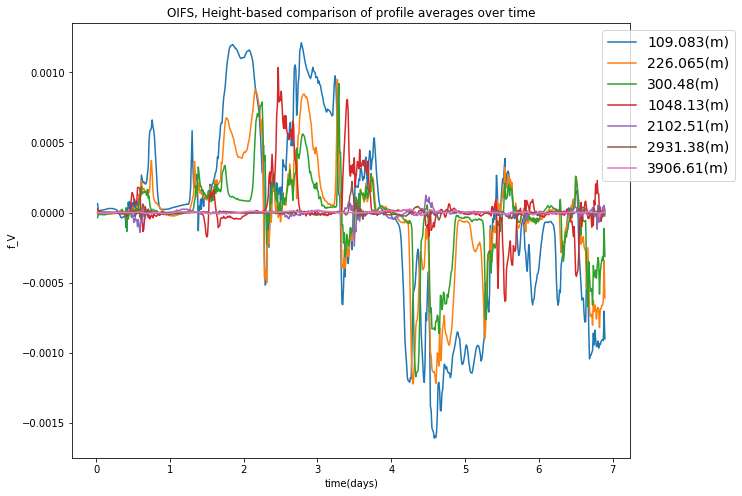

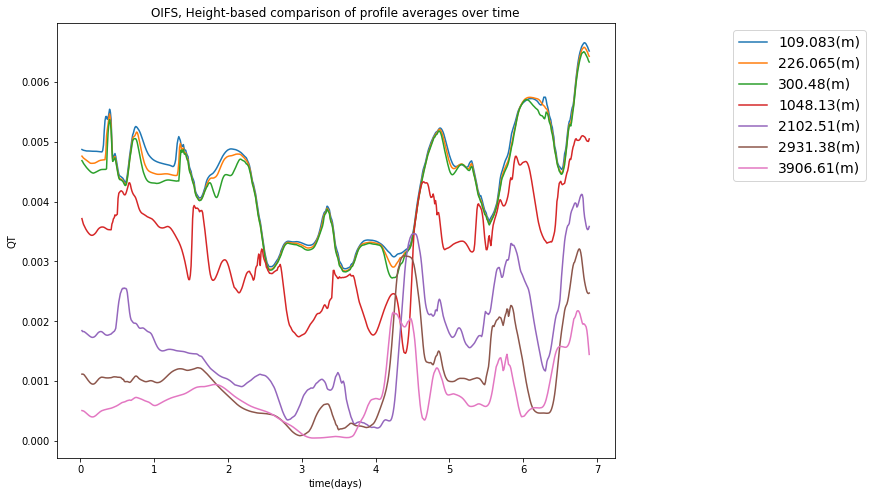

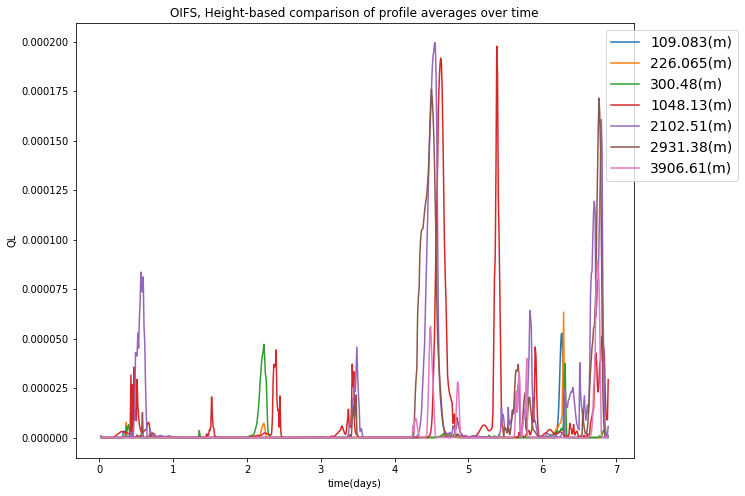

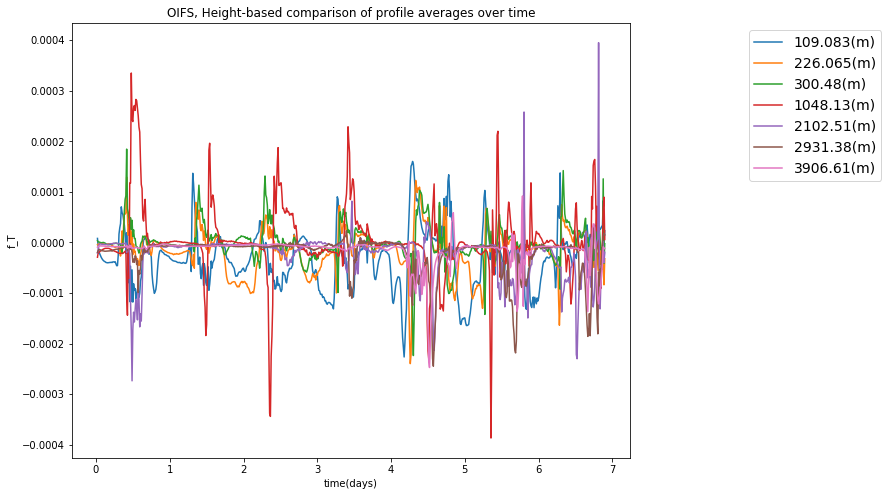

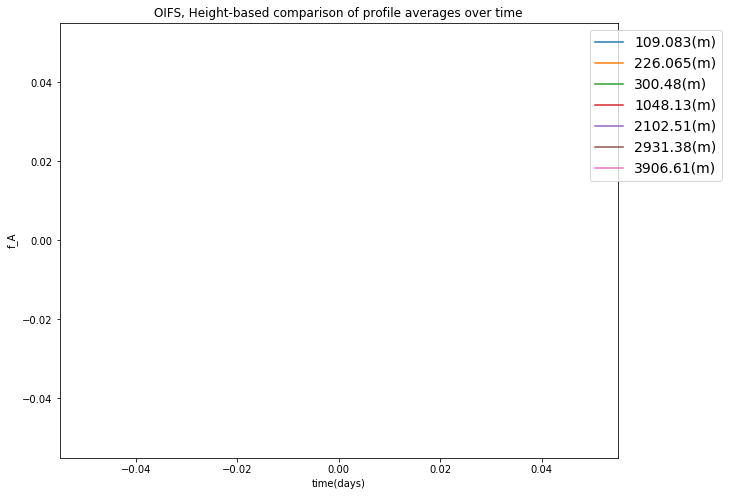

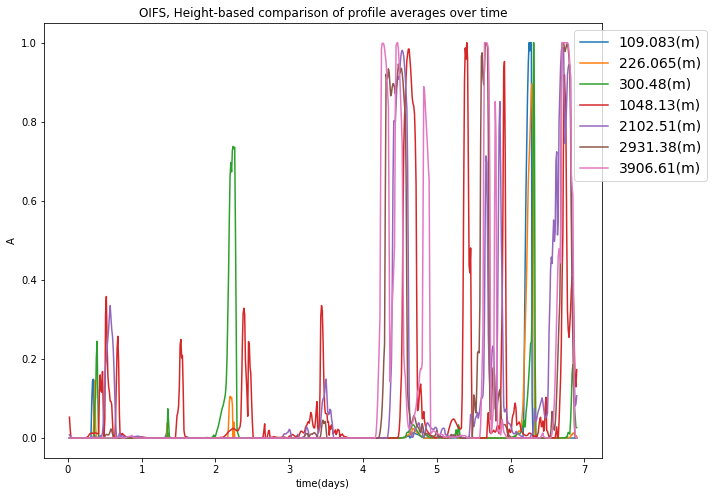

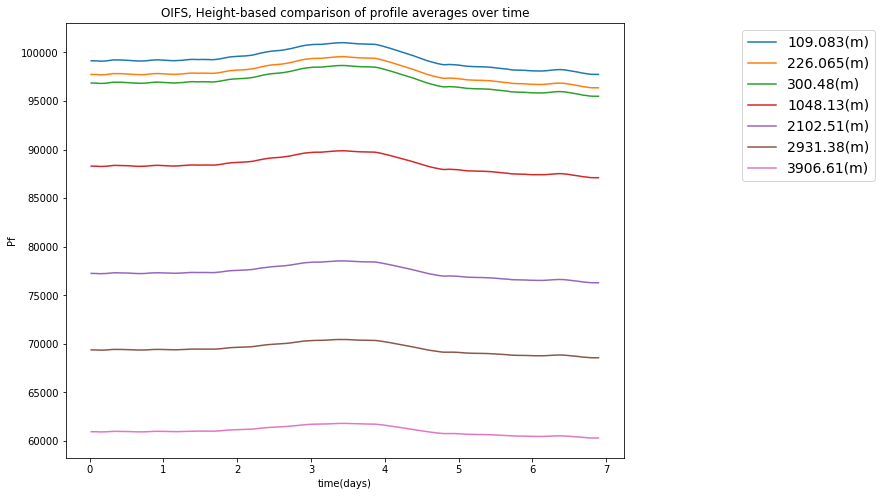

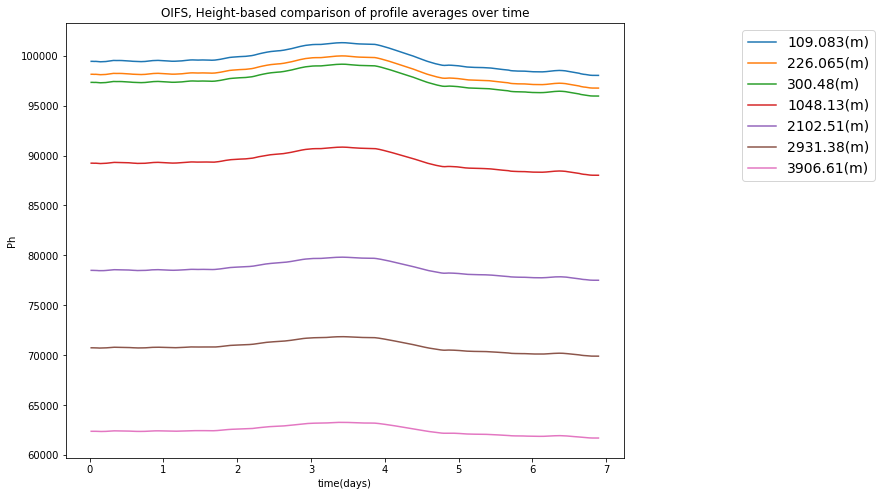

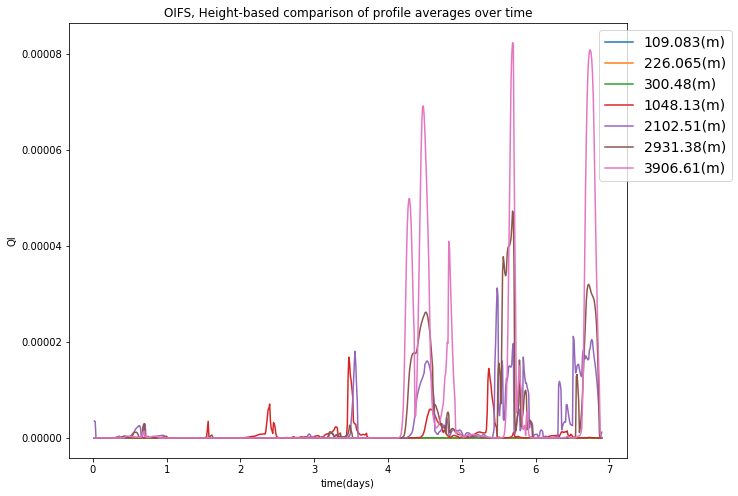

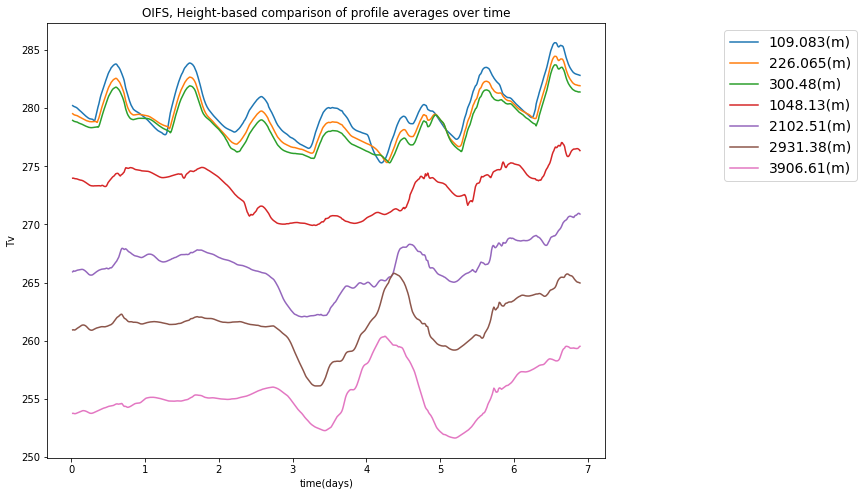

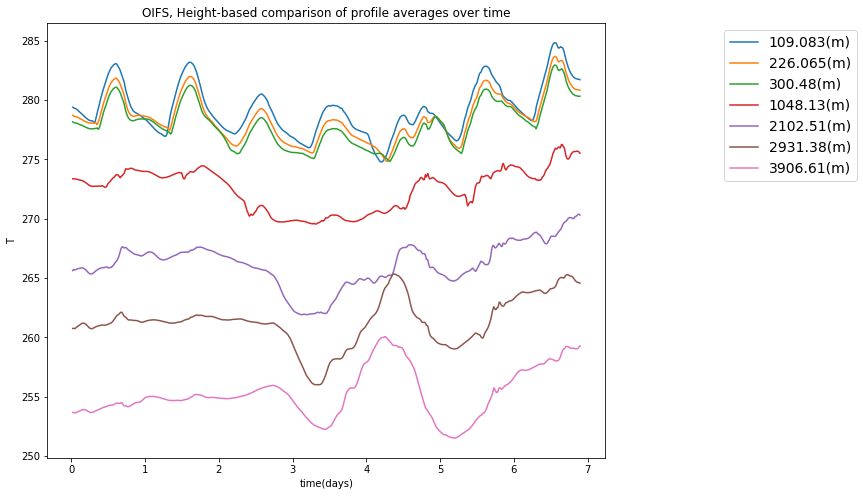

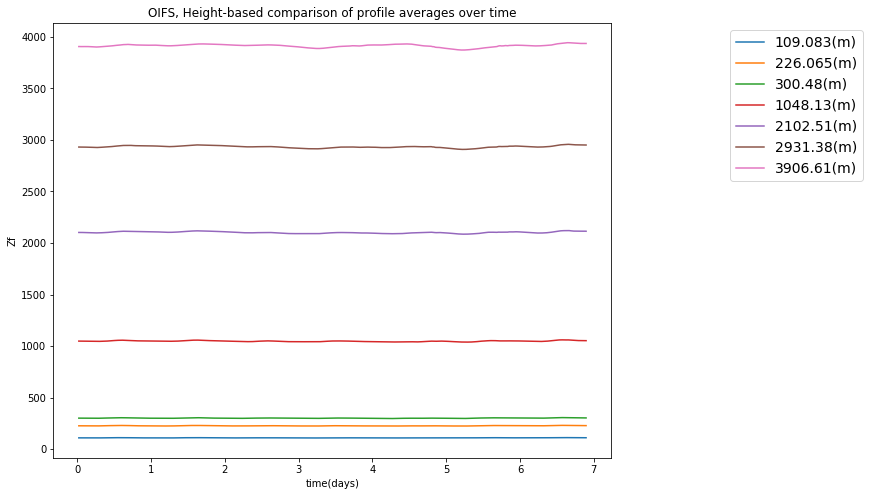

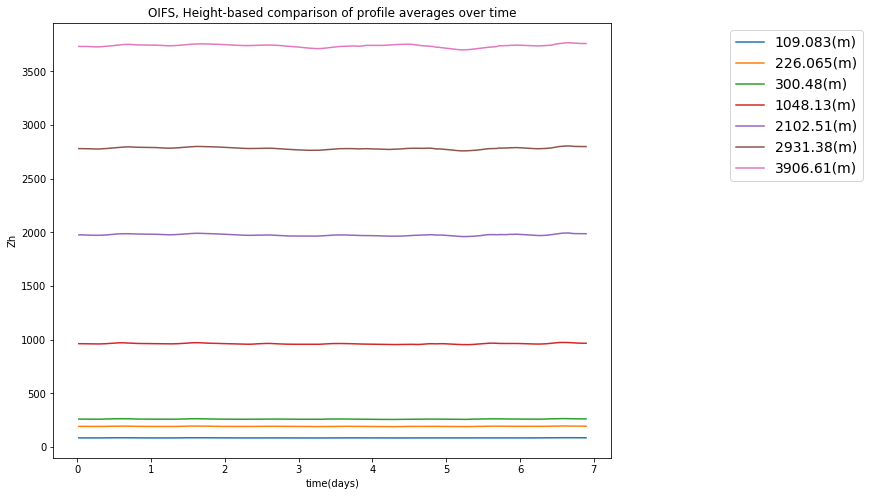

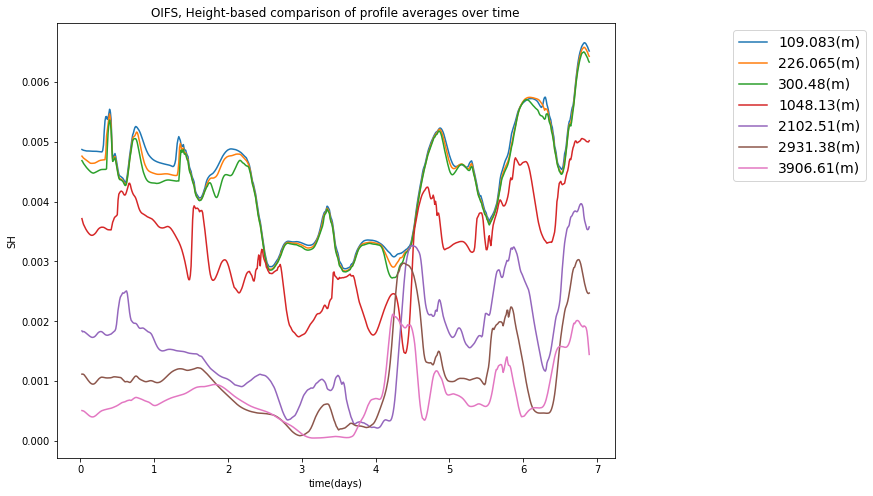

In [44]:
# OIFS 
fig_size = (10, 8)
dpi_ = 300

for var in profile_agg_OIFS:
    fig, ax = pyplot.subplots(figsize=fig_size)
    Xdata = []
    Ydata = []
    labels = []
    for k in Ref_heights:
        Xdata.append(Time_series[1:-1])
        Ydata.append(ds2[var][1:-1,k])
        labels.append(str(Height_series[1, k])+"(m)")
    
    ax1, lgd = n_plots(ax, Xdata, Ydata, "time(days)", var, labels)
    pyplot.title('OIFS, Height-based comparison of profile averages over time')
    pyplot.savefig("output/OIFS_{}_levels_timeseries.png".format(var), 
                   dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')
    pyplot.show()
    pyplot.close()

# Height profile comparison

In [128]:
# DALES height profiles at reference times
for timelevel in ref_times:
    timestring = 't = %0.2f days'%(Time_series[timelevel]) #(netcdf_2['Time'][timelevel]/3600/24)
    for plot_tuple in profile_height_DALES:
        fig, ax = pyplot.subplots(figsize=fig_size)
        var1 = plot_tuple[0]
        var2 = plot_tuple[1]
        ax1, ax2, lgd = two_x_scales(ax, 
                              ds2[var1][timelevel, :], 
                              ds2[var2][timelevel, :],
                              height_series,
                              height_series,
                              'r', 'b', 
                              var1, var2,  
                              'height(m)', labels=[var1, var2])
        pyplot.title("DALES, Average {} and {} at {}".format(var1, var2, timestring), y=1.14)
        pyplot.savefig("output/DALES_{}-{}_height_profile_{}_days.png".format(var1, var2, Time_series[timelevel]), 
                       dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')
        #pyplot.show()
        pyplot.close()


In [129]:
# OIFS height profiles at reference times
for timelevel in ref_times:
    timestring = 't = %0.2f days'%(Time_series[timelevel]) #(netcdf_2['Time'][timelevel]/3600/24)
    for plot_tuple in profile_height_OIFS:
        fig, ax = pyplot.subplots(figsize=fig_size)
        var1 = plot_tuple[0]
        var2 = plot_tuple[1]
        ax1, ax2, lgd = two_x_scales(ax, 
                              ds2[var1][timelevel, oifs_range], 
                              ds2[var2][timelevel, oifs_range],
                              Height_series[timelevel, oifs_range],
                              Height_series[timelevel, oifs_range],
                              'r', 'b', 
                              var1, var2,  
                              'height(m)', labels=[var1, var2])
        pyplot.title("OIFS, Average {} and {} at {}".format(var1, var2, timestring), y=1.14)
        pyplot.savefig("output/OIFS_{}-{}_height_profile_{}_days.png".format(var1, var2, Time_series[timelevel]), 
                       dpi = dpi_, bbox_extra_artists=(lgd,), bbox_inches='tight')
        #pyplot.show()
        pyplot.close()

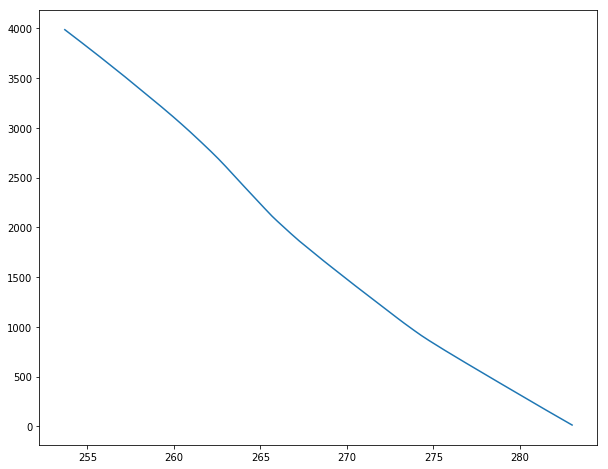

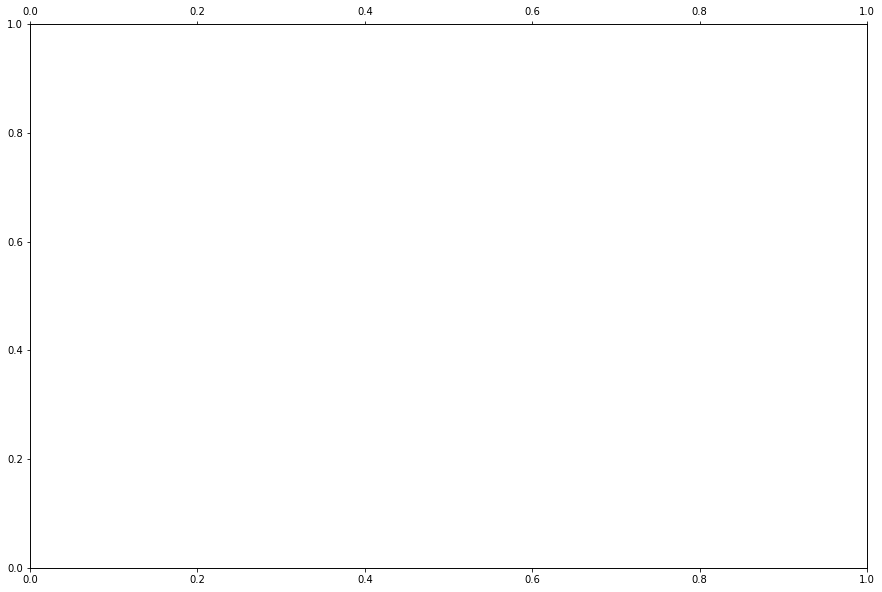

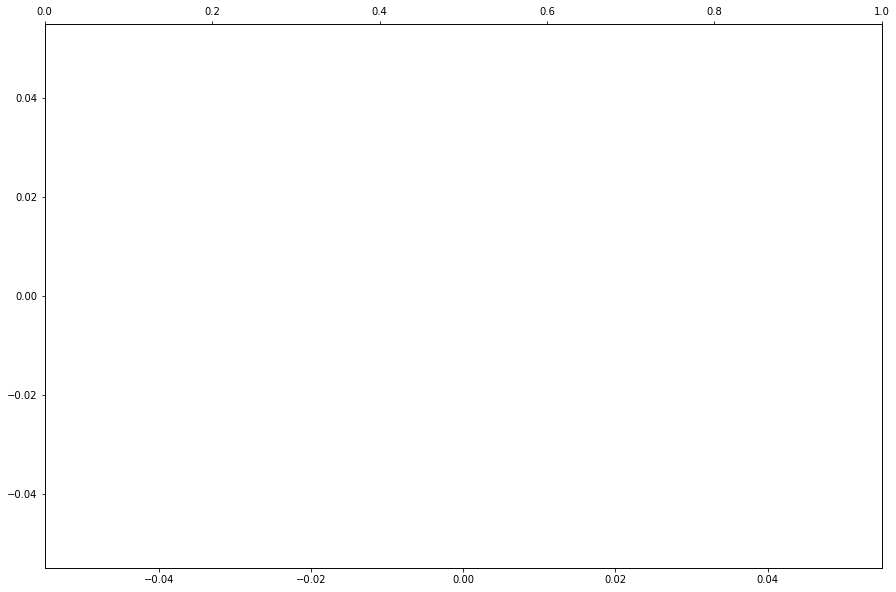

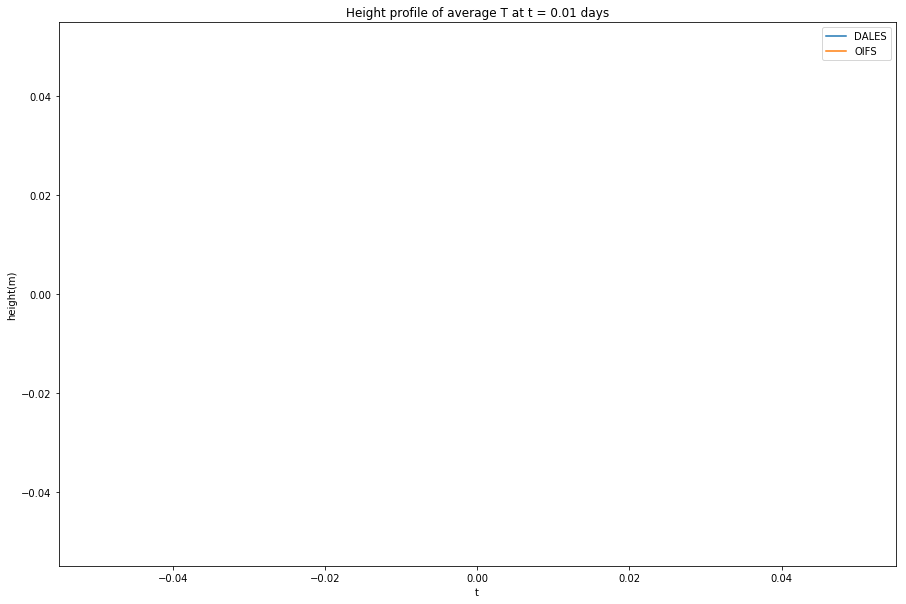

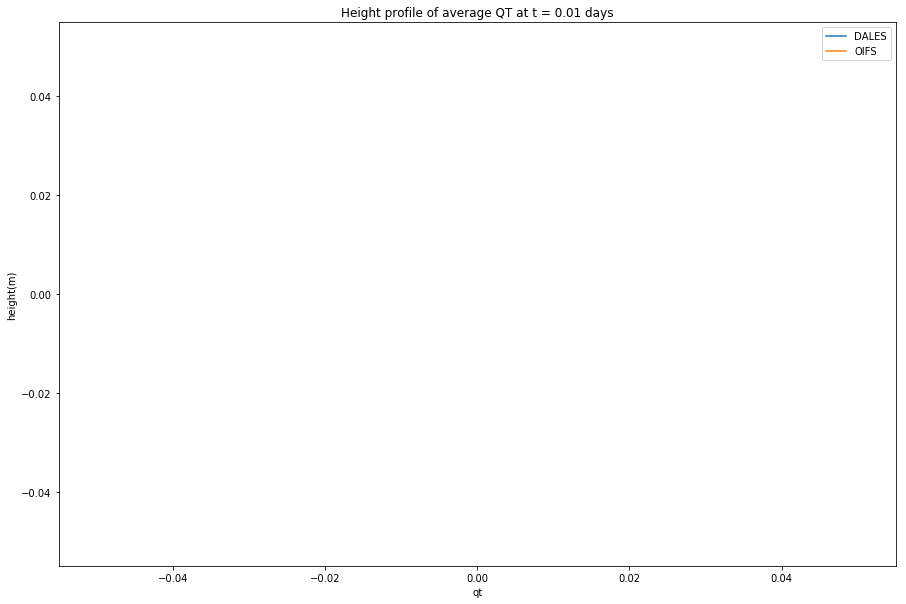

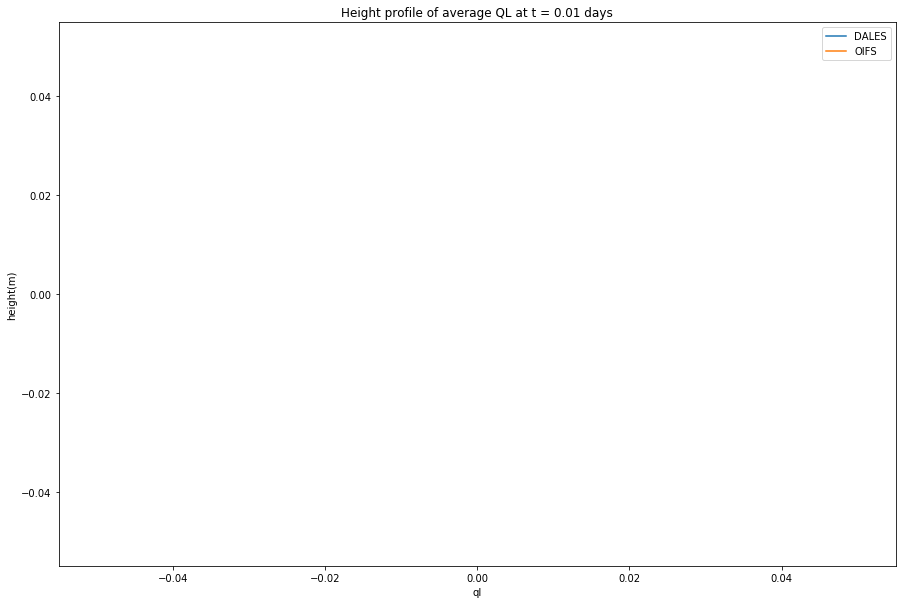

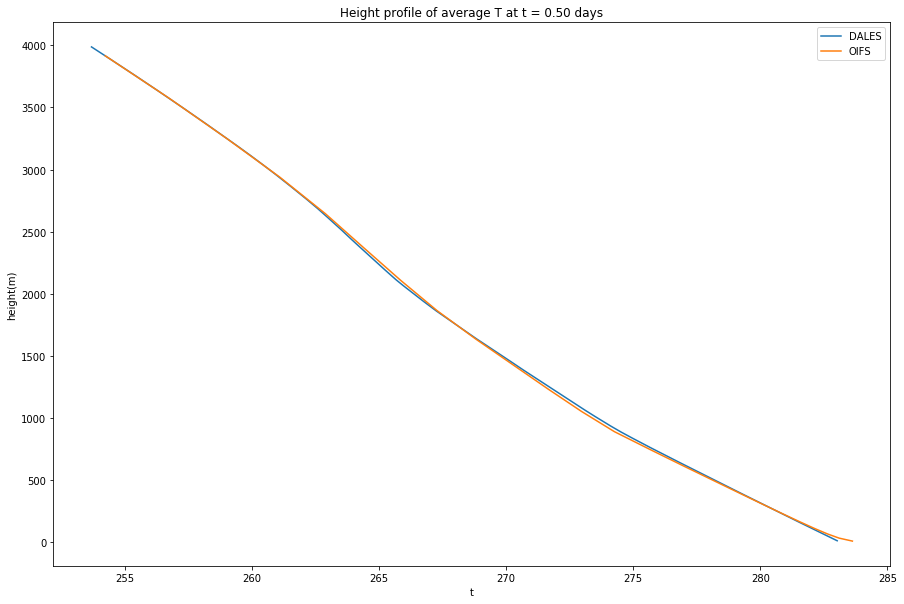

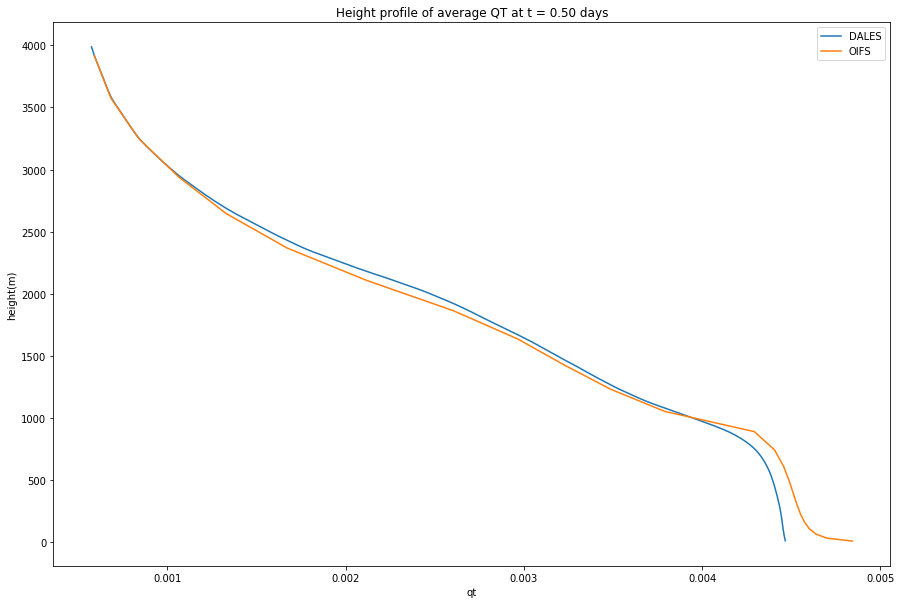

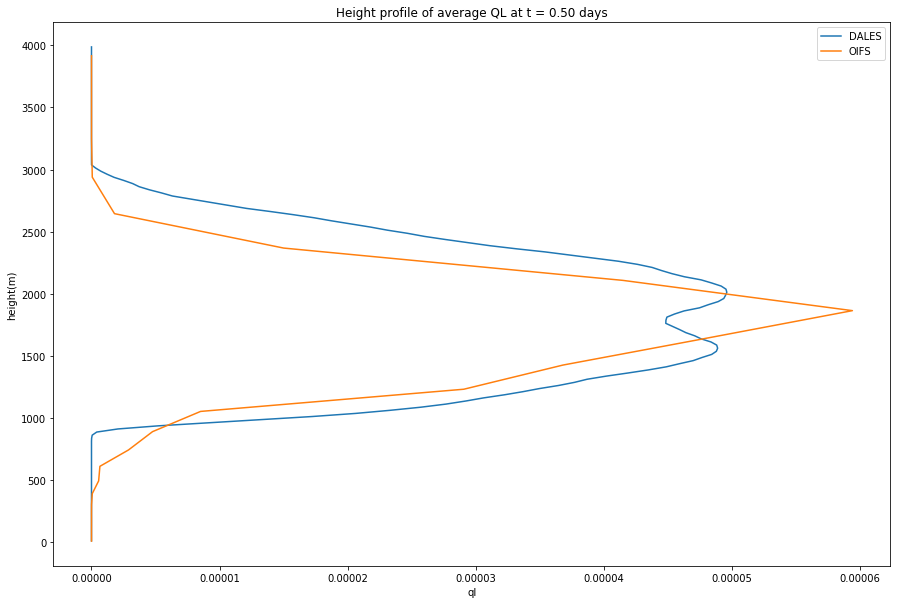

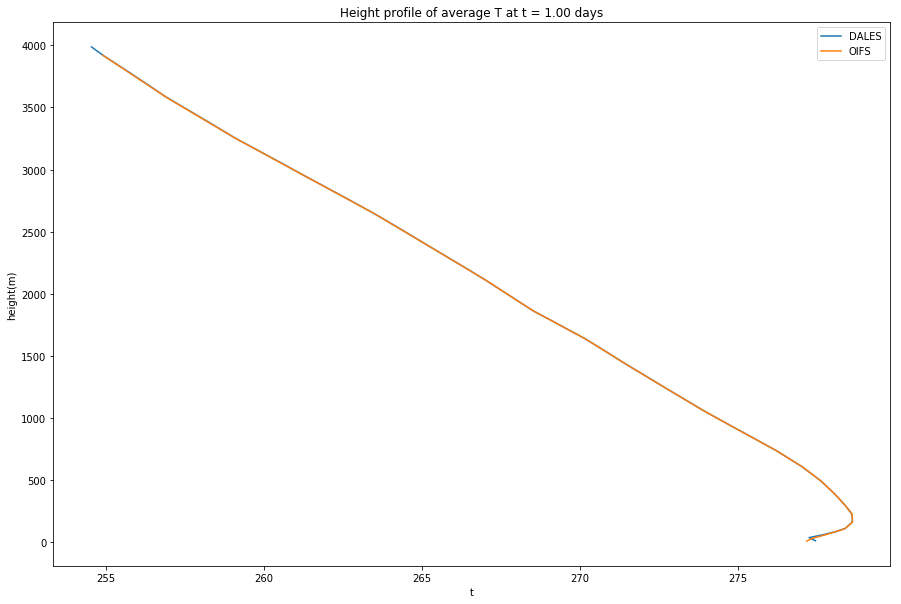

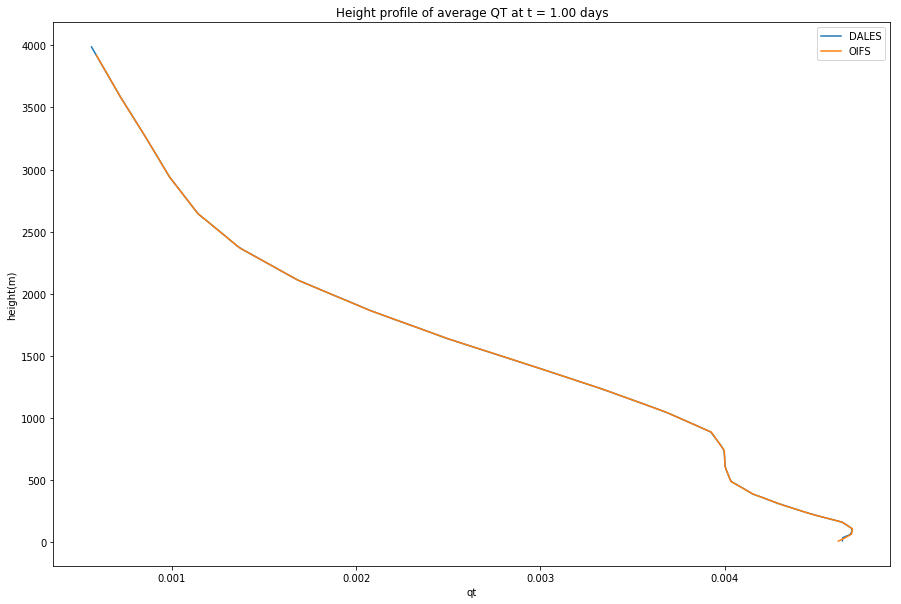

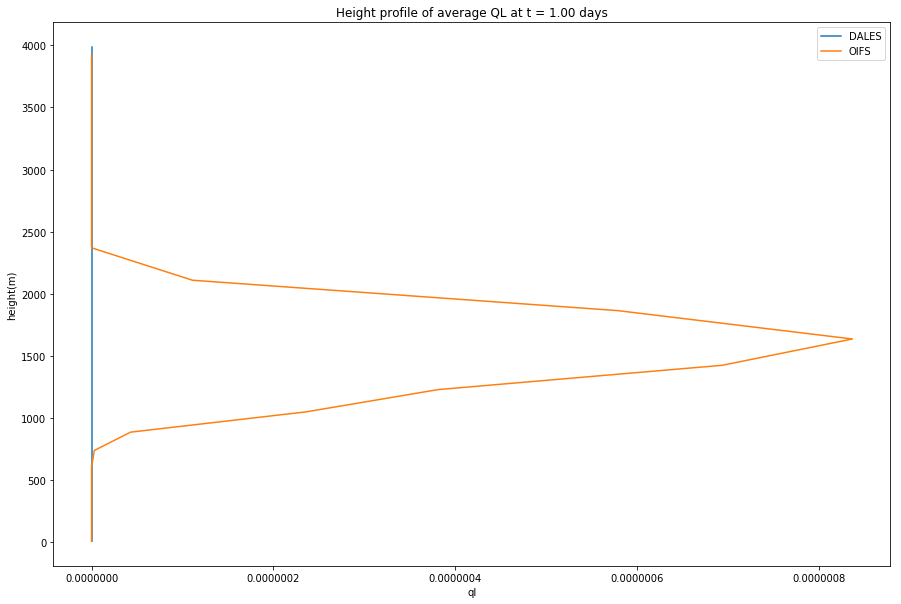

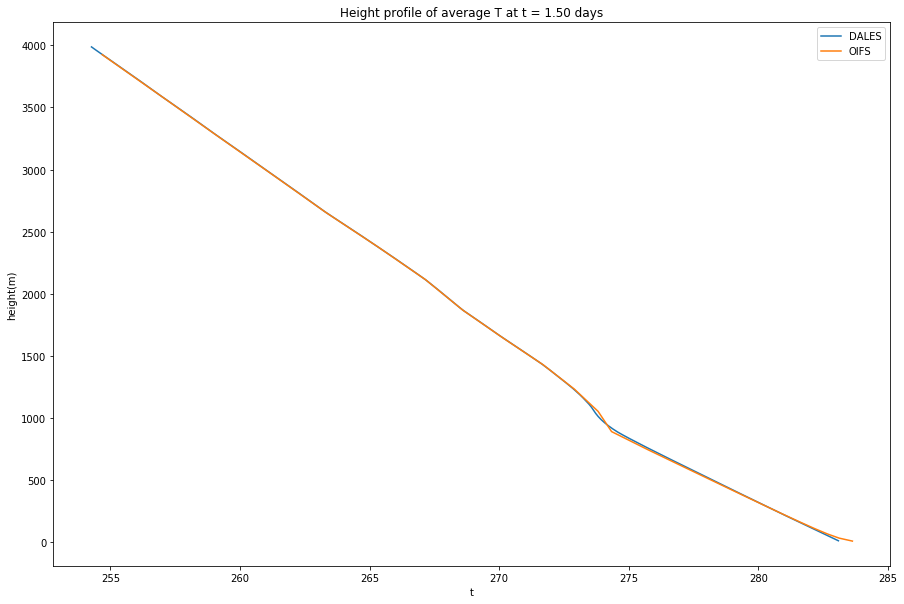

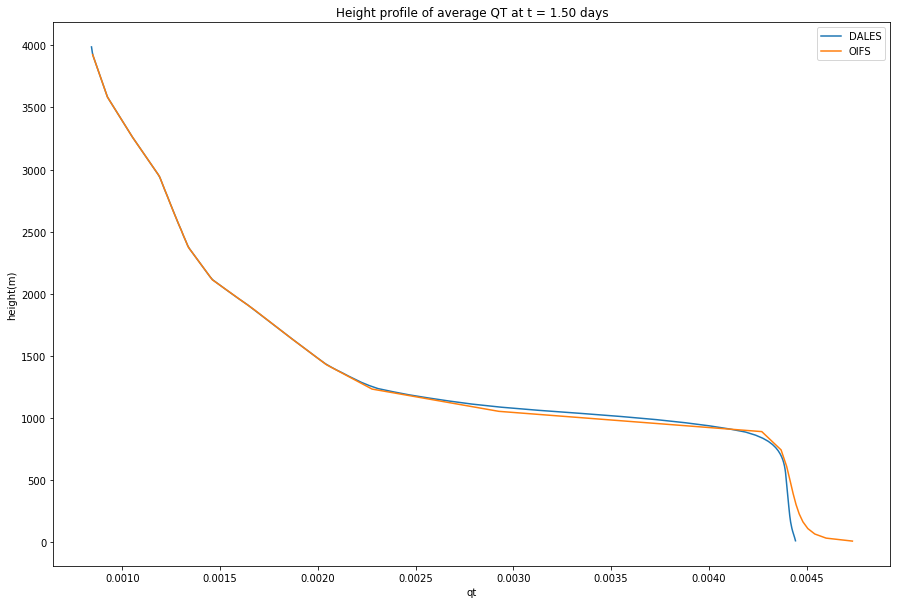

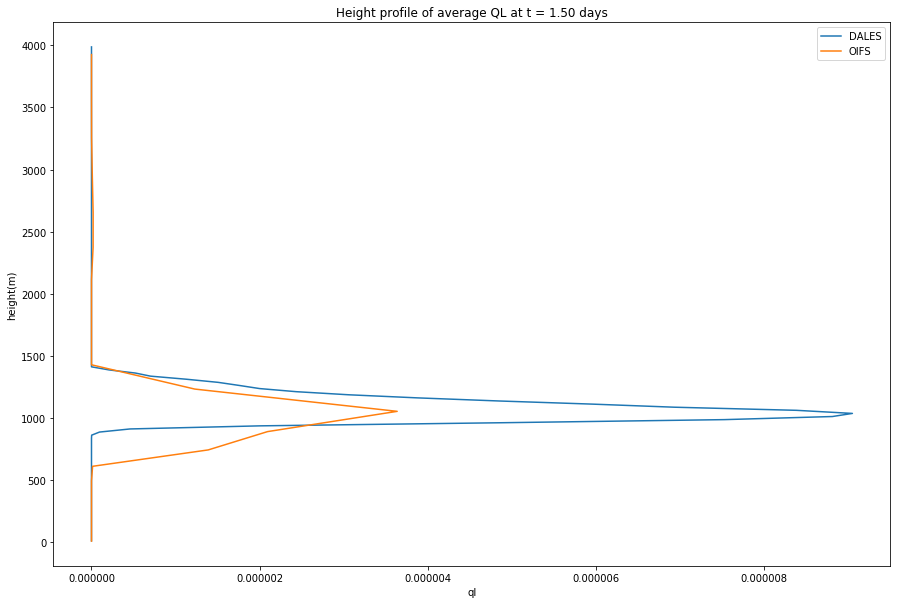

KeyboardInterrupt: 

In [105]:
# DALES OIFS height profiles at reference times
for timelevel in ref_times:
    timestring = 't = %0.2f days'%(Time_series[timelevel]) #(netcdf_2['Time'][timelevel]/3600/24)
    for plot_tuple in profile_height_comparison:
        figure = pyplot.figure(figsize=fig_size)
        pyplot.plot(ds2[plot_tuple[0]][timelevel, :], height_series, label = 'DALES')
        pyplot.plot(ds2[plot_tuple[1]][timelevel, oifs_range], Height_series[timelevel, oifs_range], label = 'OIFS')
        pyplot.xlabel(plot_tuple[0])
        pyplot.ylabel("height(m)")
        pyplot.title('Height profile of average {} at {}'.format(plot_tuple[1], timestring))
        pyplot.legend()
        pyplot.savefig("output/DALES_OIFS_{}_height_profile_{}_days.png".format(plot_tuple[1], 
                                                                                Time_series[timelevel]), dpi = dpi_)
        #pyplot.show()
        pyplot.close()

In [125]:
# DALES OIFS height profiles for water paths at reference times
for timelevel in ref_times:
    timestring = 't = %0.2f days'%(Time_series[timelevel]) #(netcdf_2['Time'][timelevel]/3600/24)
    figure = pyplot.figure(figsize=fig_size)
    pyplot.plot(lwp_profiles.data[timelevel, :], height_series, label = 'DALES')
    pyplot.plot(LWP_profiles.data[timelevel, oifs_range], Height_series[timelevel, oifs_range], label = 'OIFS')
    pyplot.xlabel(plot_tuple[0])
    pyplot.ylabel("height(m)")
    pyplot.title('Height profile of average LWP at {}'.format(timestring))
    pyplot.legend()
    pyplot.savefig("output/DALES_OIFS_LWP_height_profile_{}_days.png".format(Time_series[timelevel]), dpi = dpi_)
    #pyplot.show()
    pyplot.close()

In [127]:
# DALES OIFS height profiles for water paths at reference times
for timelevel in ref_times:
    timestring = 't = %0.2f days'%(Time_series[timelevel]) #(netcdf_2['Time'][timelevel]/3600/24)
    figure = pyplot.figure(figsize=fig_size)
    pyplot.plot(twp_profiles[timelevel, :], height_series, label = 'DALES')
    pyplot.plot(TWP_profiles[timelevel, oifs_range], Height_series[timelevel, oifs_range], label = 'OIFS')
    pyplot.xlabel(plot_tuple[0])
    pyplot.ylabel("height(m)")
    pyplot.title('Height profile of average TWP at {}'.format(timestring))
    pyplot.legend()
    pyplot.savefig("output/DALES_OIFS_TWP_height_profile_{}_days.png".format(Time_series[timelevel]), dpi = dpi_)
    #pyplot.show()
    pyplot.close()

## Comparison with measurement data

In [25]:
base_location = "C:/Users\Bram van Es/Dropbox/eScience/data_analysis/" # C:/Users\Bram van Es/ /home/bramiozo/
netcdf = Dataset(base_location+"data/cabau_750steps/spifs/spifs_750_cabau.nc", "r") 
ds = netcdf[list(netcdf.groups.keys())[0]]

## MEASUREMENTS
measurements_meta = Dataset(base_location+"data/cabau_750steps/meas/cesar_tower_meteo_lb1_t10_v1.1_201204.nc", "r") 
measurements = []
measurements.append({'datestr': '13-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041312.nc", "r")})
measurements.append({'datestr': '14-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041412.nc", "r")})
measurements.append({'datestr': '15-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041512.nc", "r")})
measurements.append({'datestr': '16-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041612.nc", "r")})
measurements.append({'datestr': '17-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041712.nc", "r")})
measurements.append({'datestr': '18-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041812.nc", "r")})
measurements.append({'datestr': '19-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/scm_in.RACMO_Cabauw_2012041912.nc", "r")})

measurements_rds = []
measurements_rds.append({'datestr': '13-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/rds_DeBilt_20120413.nc", "r")})
measurements_rds.append({'datestr': '14-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/rds_DeBilt_20120414.nc", "r")})
measurements_rds.append({'datestr': '15-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/rds_DeBilt_20120415.nc", "r")})
measurements_rds.append({'datestr': '16-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/rds_DeBilt_20120416.nc", "r")})
measurements_rds.append({'datestr': '17-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/rds_DeBilt_20120417.nc", "r")})
measurements_rds.append({'datestr': '18-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/rds_DeBilt_20120418.nc", "r")})
measurements_rds.append({'datestr': '19-04-2012','ds':Dataset(base_location+"data/cabau_750steps/meas/rds_DeBilt_20120419.nc", "r")})

It is important to note that measurements are taken at 12:00AM, whereas the simulation starts at 12:00PM.

In [26]:
meas_times_night = numpy.linspace(0., 7, num=8) # in half days 
meas_times_afternoon = numpy.linspace(0.5, 7, num=8) # in half days
ref_times_night = [numpy.argmin(numpy.abs(t - Time_series)) for t in meas_times_night]
ref_times_afternoon = [numpy.argmin(numpy.abs(t - Time_series)) for t in meas_times_afternoon]

ref_times_night[0]=1 if ref_times_night[0]==0 else ref_times_night[0]
ref_times_afternoon[0]=1 if ref_times_afternoon[0]==0 else ref_times_afternoon[0]

In [27]:
E = len(measurements[0]['ds']['height_f'][0])-1
B = numpy.argmin(numpy.abs(numpy.max(height_series)-measurements[0]['ds']['height_f'][0]))
numSteps = E - B +1
meas_h_range = list(numpy.linspace(E, B, numSteps).astype("int"))

In [28]:
B = numpy.argmin(numpy.abs(numpy.max(height_series)-measurements_rds[0]['ds']['height'][0]))
numSteps = B+1
meas_h_range_rds_afternoon = list(numpy.linspace(0, B, numSteps).astype("int"))
####
B = numpy.argmin(numpy.abs(numpy.max(height_series)-measurements_rds[0]['ds']['height'][1]))
numSteps = B+1
meas_h_range_rds_night = list(numpy.linspace(0, B, numSteps).astype("int"))

In [29]:
# rds: T, absolute velocity, theta_l, normal: cloud fraction, q, ql, qi, u, v
### NIGHT
############
for idx, meas in enumerate(measurements_rds):
    pyplot.figure(figsize=fig_size)
    pyplot.plot(meas['ds']['T'][0,meas_h_range_rds_night], meas['ds']['height'][0,meas_h_range_rds_night], label = 'measurement')
    pyplot.plot(ds['t_'][ref_times_night[idx],:], height_series, label = 'DALES')
    pyplot.plot(ds['T'][ref_times_night[idx],oifs_range], Height_series[ref_times_night[idx],oifs_range], '-o', label = 'OIFS')
    pyplot.xlabel("T(K)")
    pyplot.ylabel("height(m)")
    pyplot.title("Temperature versus height, {} 00:00AM".format(meas['datestr']))
    pyplot.legend()
    #pyplot.savefig("output/MEAS_Comparison_T_height_profile_{}_night.png".format(meas['datestr']), dpi = dpi_)
    pyplot.show()

# rds: T, absolute velocity, theta_l, normal: cloud fraction, q, ql, qi, u, v
for idx, meas in enumerate(measurements_rds):
    pyplot.figure(figsize=fig_size)
    pyplot.plot(meas['ds']['THETA'][0,meas_h_range_rds_night], meas['ds']['height'][0,meas_h_range_rds_night], label = 'measurement')
    pyplot.plot(ds['thl'][ref_times_night[idx],:], height_series, label = 'DALES')
    pyplot.plot(ds['THL'][ref_times_night[idx],oifs_range], Height_series[ref_times_night[idx],oifs_range], '-o', label = 'OIFS')
    pyplot.xlabel("T(K)")
    pyplot.ylabel("height(m)")
    pyplot.title("Theta_l versus height, {} 00:00AM".format(meas['datestr']))
    pyplot.legend()
    #pyplot.savefig("output/MEAS_Comparison_THETA_height_profile_{}_night.png".format(meas['datestr']), dpi = dpi_)
    #pyplot.show()
    
for idx, meas in enumerate(measurements_rds):
    pyplot.figure(figsize=fig_size)
    pyplot.plot(meas['ds']['QV'][0,meas_h_range_rds_night], meas['ds']['height'][0,meas_h_range_rds_night], label = 'measurement')
    pyplot.plot(ds['qt'][ref_times_night[idx],:] - ds['ql'][ref_times_night[idx],:] , height_series, label = 'DALES')
    pyplot.plot(ds['SH'][ref_times_night[idx],oifs_range], Height_series[ref_times_night[idx],oifs_range], '-o', label = 'OIFS')
    pyplot.xlabel("QV(K)")
    pyplot.ylabel("height(m)")
    pyplot.title("QV versus height, {} 00:00AM".format(meas['datestr']))
    pyplot.legend()
    #pyplot.savefig("output/MEAS_Comparison_QV_height_profile_{}_night.png".format(meas['datestr']), dpi = dpi_)
    #pyplot.show()
        
    

### MORNING
##############
for idx, meas in enumerate(measurements_rds):
    pyplot.figure(figsize=fig_size)
    pyplot.plot(meas['ds']['T'][1,meas_h_range_rds_afternoon], meas['ds']['height'][1,meas_h_range_rds_afternoon], label = 'measurement')
    pyplot.plot(ds['t_'][ref_times_afternoon[idx],:], height_series, label = 'DALES')
    pyplot.plot(ds['T'][ref_times_afternoon[idx],oifs_range], Height_series[ref_times_afternoon[idx],oifs_range], '-o', label = 'OIFS')
    pyplot.xlabel("T(K)")
    pyplot.ylabel("height(m)")
    pyplot.title("Temperature versus height, {} 12:00AM".format(meas['datestr']))
    pyplot.legend()
    #pyplot.savefig("output/MEAS_Comparison_T_height_profile_{}_afternoon.png".format(meas['datestr']), dpi = dpi_)
    #pyplot.show()

# rds: T, absolute velocity, theta_l, normal: cloud fraction, q, ql, qi, u, v
for idx, meas in enumerate(measurements_rds):
    pyplot.figure(figsize=fig_size)
    pyplot.plot(meas['ds']['THETA'][1,meas_h_range_rds_afternoon], meas['ds']['height'][1,meas_h_range_rds_afternoon], label = 'measurement')
    pyplot.plot(ds['thl'][ref_times_afternoon[idx],:], height_series, label = 'DALES')
    pyplot.plot(ds['THL'][ref_times_afternoon[idx],oifs_range], Height_series[ref_times_afternoon[idx],oifs_range], '-o', label = 'OIFS')
    pyplot.xlabel("T(K)")
    pyplot.ylabel("height(m)")
    pyplot.title("Theta_l versus height, {} 12:00AM".format(meas['datestr']))
    pyplot.legend()
    #pyplot.savefig("output/MEAS_Comparison_THETA_height_profile_{}_afternoon.png".format(meas['datestr']), dpi = dpi_)
    #pyplot.show()
    
for idx, meas in enumerate(measurements_rds):
    pyplot.figure(figsize=fig_size)
    pyplot.plot(meas['ds']['QV'][1,meas_h_range_rds_afternoon], meas['ds']['height'][1,meas_h_range_rds_afternoon], label = 'measurement')
    pyplot.plot(ds['qt'][ref_times_afternoon[idx],:] - ds['ql'][ref_times_afternoon[idx],:] , height_series, label = 'DALES')
    pyplot.plot(ds['SH'][ref_times_afternoon[idx],oifs_range], Height_series[ref_times_afternoon[idx],oifs_range], '-o', label = 'OIFS')
    pyplot.xlabel("QV(K)")
    pyplot.ylabel("height(m)")
    pyplot.title("QV versus height, {} 12:00AM".format(meas['datestr']))
    pyplot.legend()
    pyplot.savefig("output/MEAS_Comparison_QV_height_profile_{}_afternoon.png".format(meas['datestr']), dpi = dpi_)
    #pyplot.show()

c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [40]:
# rds: absolute velocity
ref_times[0]=1
for idx, meas in enumerate(measurements):
    pyplot.figure(figsize=fig_size)
    pyplot.plot(numpy.sqrt(meas['ds']['u'][0, meas_h_range]**2+meas['ds']['v'][0, meas_h_range]**2), meas['ds']['height_f'][0, meas_h_range], label = 'measurement')
    pyplot.plot(numpy.sqrt(ds['u'][ref_times[idx],:]**2+ds['v'][ref_times[idx],:]**2), height_series, label = 'DALES')
    pyplot.plot(numpy.sqrt(ds['U'][ref_times[idx],oifs_range]**2+ds['V'][ref_times[idx],oifs_range]**2), Height_series[ref_times[idx],oifs_range], '-o', label = 'OIFS')
    pyplot.xlabel("Vabs(m/s)")
    pyplot.ylabel("height(m)")
    pyplot.title("Absolute velocity versus height, {} 12:00AM".format(meas['datestr']))
    pyplot.legend()
    #pyplot.savefig("output/MEAS_Comparison_Vabs_height_profile_{}_afternoon.png".format(meas['datestr']), dpi = dpi_)
    pyplot.show()
    


In [36]:
# rds: U velocity
for idx, meas in enumerate(measurements):
    pyplot.figure(figsize=fig_size)
    pyplot.plot(meas['ds']['u'][0, meas_h_range], meas['ds']['height_f'][0, meas_h_range], label = 'measurement')
    pyplot.plot(ds['u'][ref_times[idx],:], height_series, label = 'DALES')
    pyplot.plot(ds['U'][ref_times[idx],oifs_range], Height_series[ref_times[idx],oifs_range], '-o', label = 'OIFS')
    pyplot.xlabel("U(m/s)")
    pyplot.ylabel("height(m)")
    pyplot.title("Velocity u versus height, {} 12:00AM".format(meas['datestr']))
    pyplot.legend()
    #pyplot.savefig("output/MEAS_Comparison_U_height_profile_{}_afternoon.png".format(meas['datestr']), dpi = 100)
    pyplot.show()

In [310]:
# rds: V velocity
for idx, meas in enumerate(measurements):
    pyplot.figure(figsize=fig_size)
    pyplot.plot(meas['ds']['v'][0, meas_h_range], meas['ds']['height_f'][0, meas_h_range], label = 'measurement')
    pyplot.plot(ds['v'][ref_times[idx],:], height_series, label = 'DALES')
    pyplot.plot(ds['V'][ref_times[idx],oifs_range], Height_series[ref_times[idx],oifs_range], '-o', label = 'OIFS')
    pyplot.xlabel("V(m/s)")
    pyplot.ylabel("height(m)")
    pyplot.title("Velocity u versus height, {} 12:00AM".format(meas['datestr']))
    pyplot.legend()
    pyplot.savefig("output/MEAS_Comparison_V_height_profile_{}_afternoon.png".format(meas['datestr']), dpi = dpi_)
    #pyplot.show()

c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [314]:
# rds: QL
for idx, meas in enumerate(measurements):
    pyplot.figure(figsize=fig_size)
    pyplot.plot(meas['ds']['ql'][0, meas_h_range], meas['ds']['height_f'][0, meas_h_range], label = 'measurement')
    pyplot.plot(ds['ql'][ref_times[idx],:], height_series, label = 'DALES')
    pyplot.plot(ds['QL'][ref_times[idx],oifs_range], Height_series[ref_times[idx],oifs_range], '-o', label = 'OIFS')
    pyplot.xlabel("QL")
    pyplot.ylabel("height(m)")
    pyplot.title("QL versus height, {} 12:00AM".format(meas['datestr']))
    pyplot.legend()
    pyplot.savefig("output/MEAS_Comparison_QL_height_profile_{}_afternoon.png".format(meas['datestr']), dpi = dpi_)
    #pyplot.show()

In [315]:
# rds: QT
for idx, meas in enumerate(measurements):
    pyplot.figure(figsize=fig_size)
    pyplot.plot(meas['ds']['q'][0, meas_h_range], meas['ds']['height_f'][0, meas_h_range], label = 'measurement')
    pyplot.plot(ds['qt'][ref_times[idx],:], height_series, label = 'DALES')
    pyplot.plot(ds['QT'][ref_times[idx],oifs_range], Height_series[ref_times[idx],oifs_range], '-o', label = 'OIFS')
    pyplot.xlabel("QT")
    pyplot.ylabel("height(m)")
    pyplot.title("QT versus height, {} 12:00AM".format(meas['datestr']))
    pyplot.legend()
    pyplot.savefig("output/MEAS_Comparison_QT_height_profile_{}_afternoon.png".format(meas['datestr']), dpi = dpi_)
    #pyplot.show()

In [317]:
# rds: Cloud fraction
for idx, meas in enumerate(measurements):
    pyplot.figure(figsize=fig_size)
    pyplot.plot(meas['ds']['cloud_fraction'][0, meas_h_range], meas['ds']['height_f'][0, meas_h_range], label = 'measurement')
    #pyplot.plot(ds['qt'][ref_times[idx],:], height_series, label = 'DALES')
    pyplot.plot(ds['A'][ref_times[idx],oifs_range], Height_series[ref_times[idx],oifs_range], '-o', label = 'DALES')
    pyplot.xlabel("A")
    pyplot.ylabel("height(m)")
    pyplot.title("Cloud fraction versus height, {} 12:00AM".format(meas['datestr']))
    pyplot.legend()
    pyplot.savefig("output/MEAS_Comparison_A_height_profile_{}_afternoon.png".format(meas['datestr']), dpi = dpi_)
    #pyplot.show()